## <center> MOBILE PRICE PREDICTION

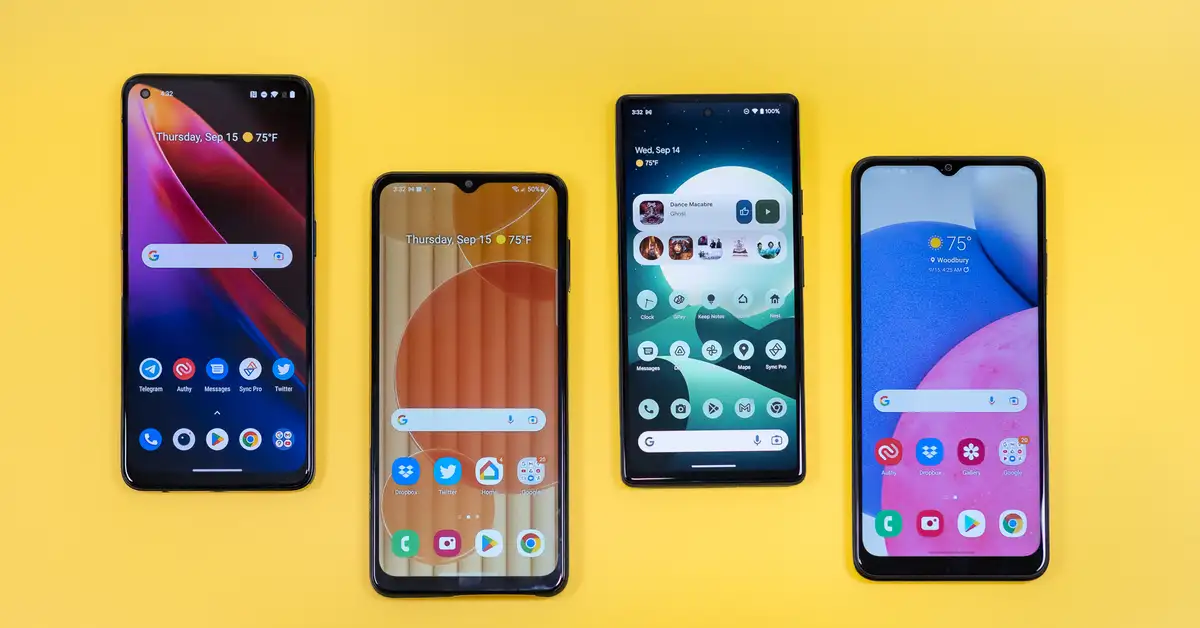

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import klib as k
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv('Mobile dataset.csv')

In [3]:
data.head()

brand           model base_color processor screen_size  ROM  RAM  \
0  Apple       iPhone SE      Black     Water  Very Small   64    2   
1  Apple  iPhone 12 Mini        Red   Ceramic       Small   64    4   
2  Apple       iPhone SE        Red     Water  Very Small   64    2   
3  Apple       iPhone XR     Others       iOS      Medium   64    3   
4  Apple       iPhone 12        Red   Ceramic      Medium  128    4   

   display_size  num_rear_camera  num_front_camera  battery_capacity  ratings  \
0           4.7                1                 1              1800      4.5   
1           5.4                2                 1              2815      4.5   
2           4.7                1                 1              1800      4.5   
3           6.1                1                 1              2942      4.6   
4           6.1                2                 1              2815      4.6   

   num_of_ratings  sales_price  discount_percent   sales  
0           38645        32999              0.17  127.52  
1             244        57149              0.04    1.39  
2           38645        32999              0.17  127.52  
3            5366        42999              0.10   23.07  
4             745        69149              0.02    5.15

In [4]:
data.tail()

brand          model base_color processor screen_size  ROM  RAM  \
425  Xiaomi    Redmi 6 Pro      Black  Qualcomm       Small   32    3   
426  Xiaomi    Redmi 6 Pro        Red  Qualcomm       Small   64    4   
427  Xiaomi     Mi 11 Lite     Others  Qualcomm       Large  128    6   
428  Xiaomi  Redmi 8A Dual       Blue  Qualcomm      Medium   32    3   
429  Xiaomi    Redmi 6 Pro       Blue  Qualcomm       Small   32    3   

     display_size  num_rear_camera  num_front_camera  battery_capacity  \
425           5.8                2                 1              4000   
426           5.8                2                 1              4000   
427           6.5                3                 1              4250   
428           6.2                2                 1              5000   
429           5.8                2                 1              4000   

     ratings  num_of_ratings  sales_price  discount_percent  sales  
425      4.3            1870         7999              0.30   1.50  
426      4.3            1783         9699              0.28   1.73  
427      4.2            1554        21999              0.12   3.42  
428      4.2            8161         8299              0.07   6.77  
429      4.3            1870         8190              0.36   1.53

In [5]:
data.sample()

brand        model base_color processor screen_size  ROM  RAM  \
314  Samsung  Galaxy A21s      Black    Exynos       Large   64    6   

     display_size  num_rear_camera  num_front_camera  battery_capacity  \
314           6.5                4                 1              5000   

     ratings  num_of_ratings  sales_price  discount_percent  sales  
314      4.2            1143        15199              0.01   1.74

In [6]:
data.describe()

ROM         RAM  display_size  num_rear_camera  \
count  430.000000  430.000000    430.000000       430.000000   
mean   105.748837    5.320930      6.369767         2.904651   
std     63.164064    2.182635      0.369549         0.952350   
min      8.000000    1.000000      4.700000         1.000000   
25%     64.000000    4.000000      6.300000         2.000000   
50%    128.000000    4.000000      6.500000         3.000000   
75%    128.000000    6.000000      6.500000         4.000000   
max    512.000000   12.000000      7.600000         4.000000   

       num_front_camera  battery_capacity     ratings  num_of_ratings  \
count        430.000000        430.000000  430.000000      430.000000   
mean           1.044186       4529.397674    4.339302    23567.944186   
std            0.227280        986.907252    0.151494    56096.277784   
min            1.000000       1800.000000    3.000000        4.000000   
25%            1.000000       4000.000000    4.300000      745.000000   
50%            1.000000       4500.000000    4.300000     5197.500000   
75%            1.000000       5000.000000    4.400000    21089.250000   
max            3.000000       7000.000000    4.600000   642373.000000   

         sales_price  discount_percent       sales  
count     430.000000        430.000000  430.000000  
mean    25433.234884          0.108000   29.752326  
std     22471.926588          0.073432   58.399588  
min      5742.000000          0.010000    0.000000  
25%     11999.000000          0.060000    1.640000  
50%     16989.500000          0.090000    9.655000  
75%     28999.000000          0.160000   29.717500  
max    157999.000000          0.440000  550.190000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [8]:
data.shape

(430, 16)

In [9]:
data.isnull().mean()

brand               0.0
model               0.0
base_color          0.0
processor           0.0
screen_size         0.0
ROM                 0.0
RAM                 0.0
display_size        0.0
num_rear_camera     0.0
num_front_camera    0.0
battery_capacity    0.0
ratings             0.0
num_of_ratings      0.0
sales_price         0.0
discount_percent    0.0
sales               0.0
dtype: float64

In [10]:
data.duplicated().sum()

0

## Label encoding catagorical columns

In [11]:
le=LabelEncoder()

In [12]:
cols=['brand','model','base_color','processor','screen_size']
data[cols]=data[cols].apply(le.fit_transform)

In [13]:
data.head()

brand  model  base_color  processor  screen_size  ROM  RAM  display_size  \
0      0    117           0          5            4   64    2           4.7   
1      0    114           8          0            2   64    4           5.4   
2      0    117           8          5            4   64    2           4.7   
3      0    118           6          6            1   64    3           6.1   
4      0    113           8          0            1  128    4           6.1   

   num_rear_camera  num_front_camera  battery_capacity  ratings  \
0                1                 1              1800      4.5   
1                2                 1              2815      4.5   
2                1                 1              1800      4.5   
3                1                 1              2942      4.6   
4                2                 1              2815      4.6   

   num_of_ratings  sales_price  discount_percent   sales  
0           38645        32999              0.17  127.52  
1             244        57149              0.04    1.39  
2           38645        32999              0.17  127.52  
3            5366        42999              0.10   23.07  
4             745        69149              0.02    5.15

## Univariate Analysis

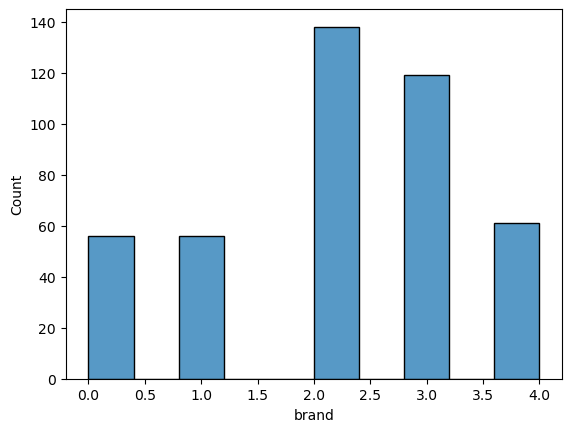

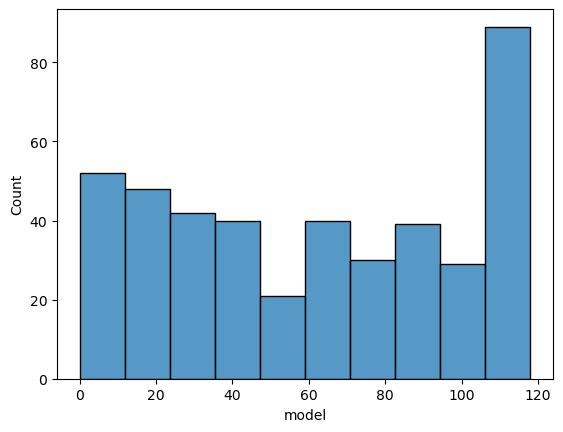

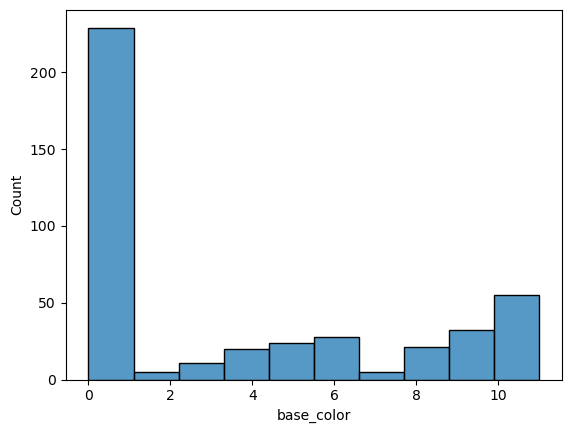

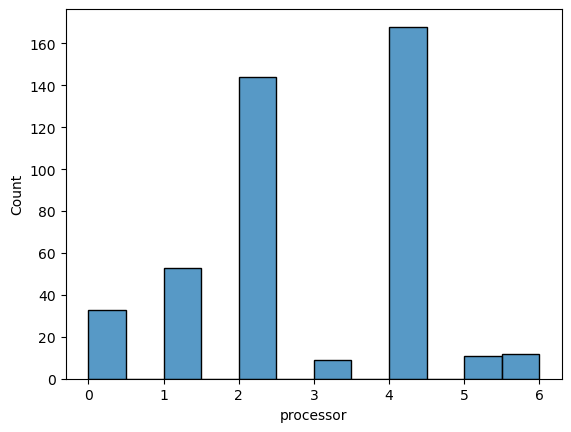

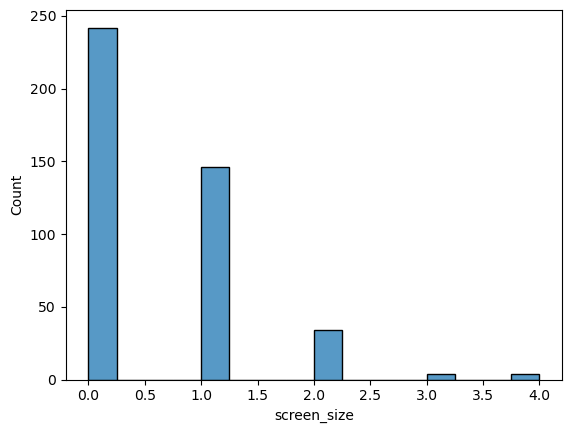

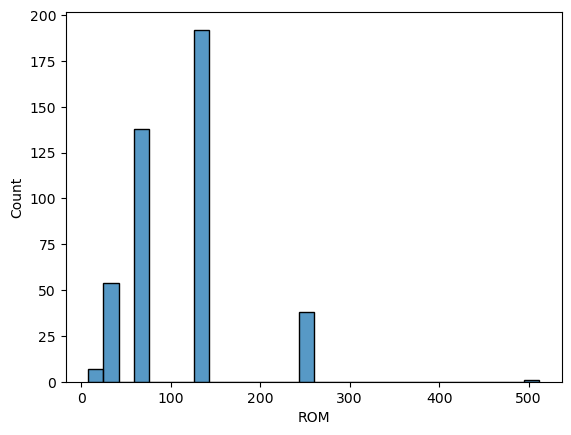

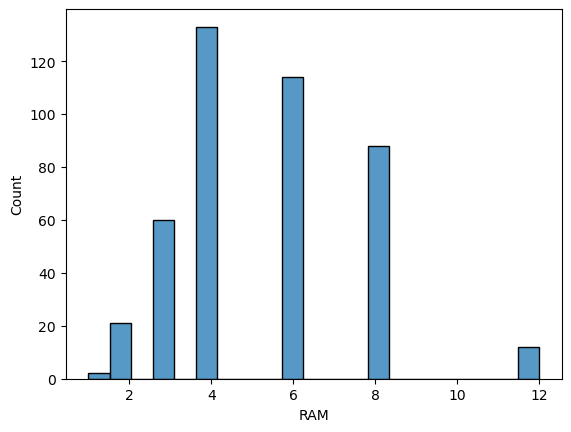

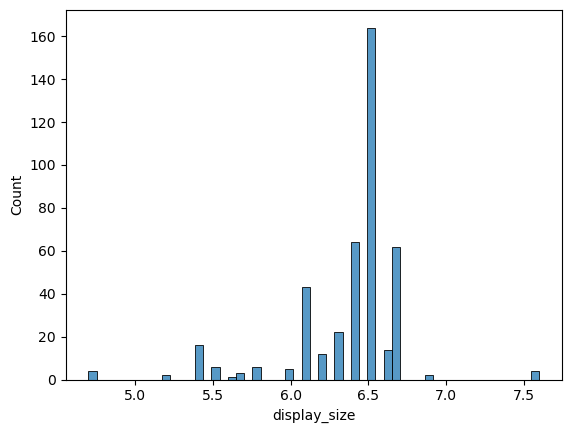

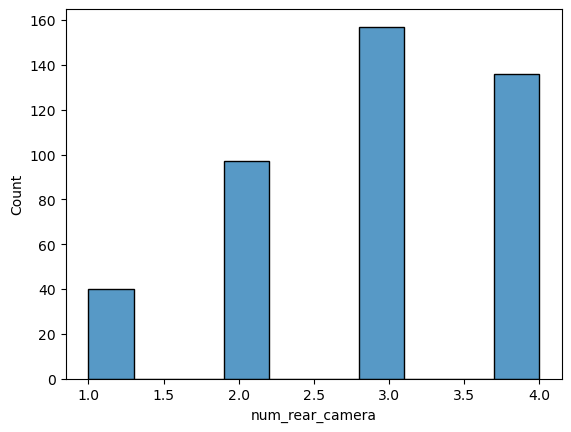

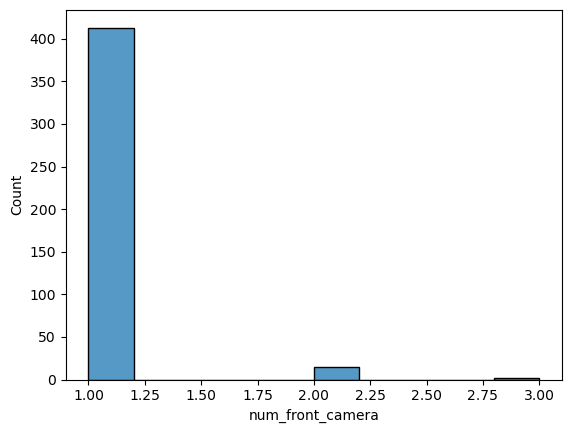

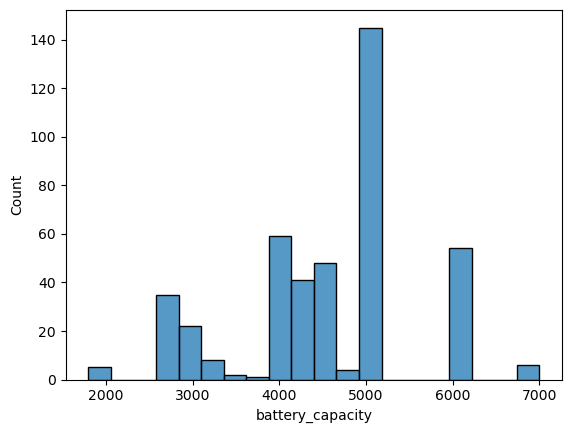

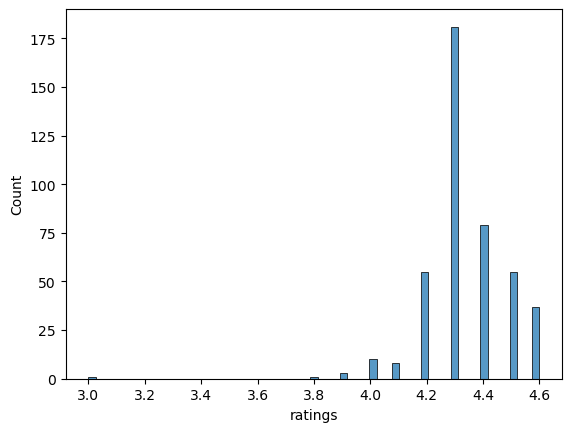

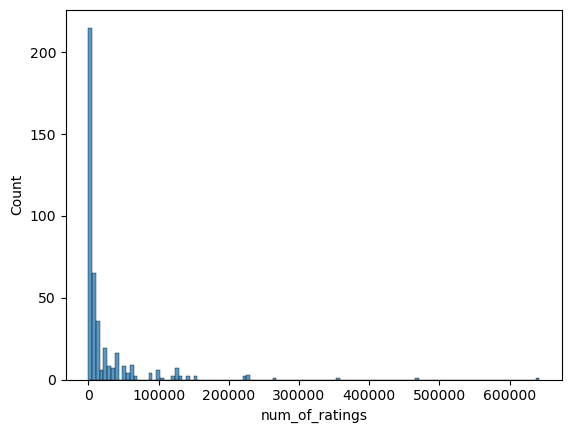

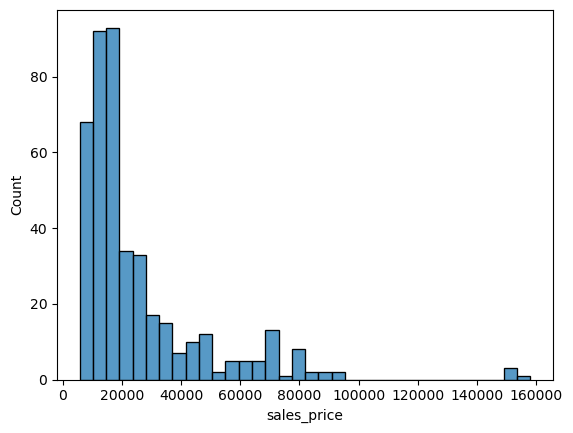

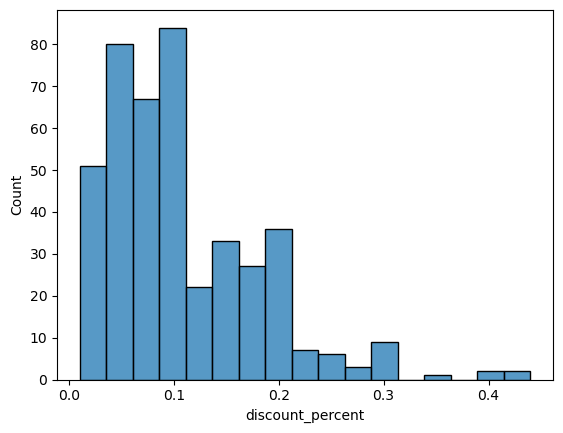

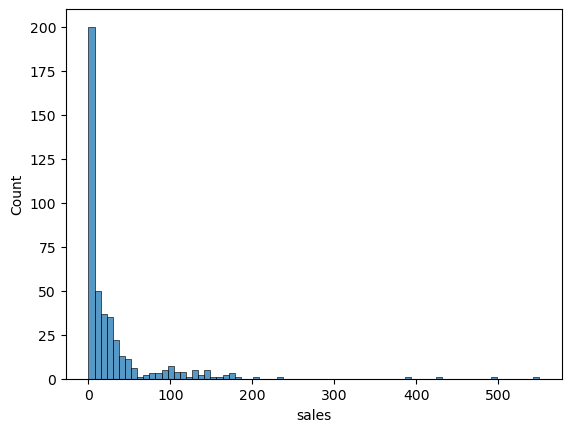

In [14]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x=data[i])
        plt.show()

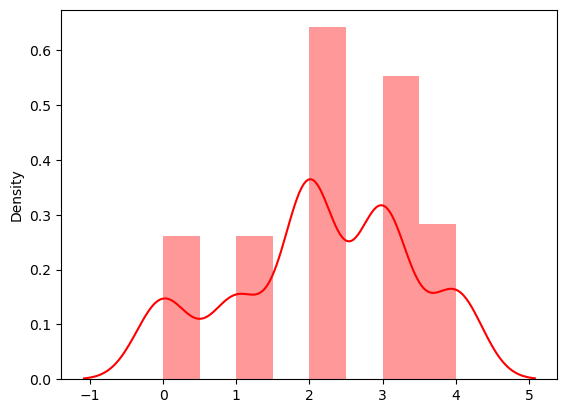

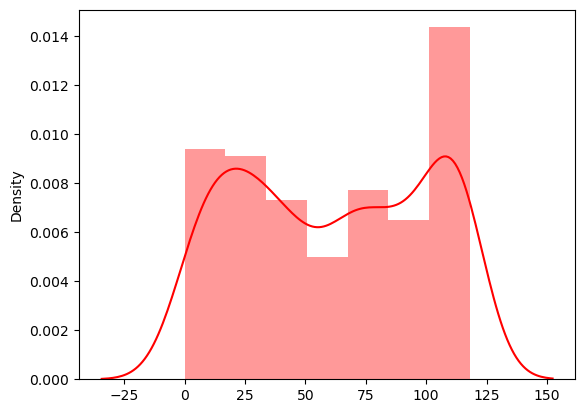

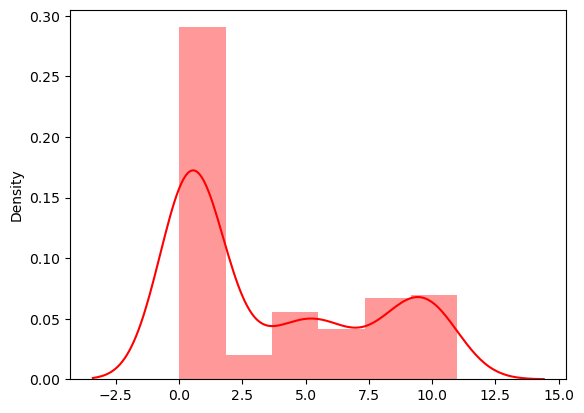

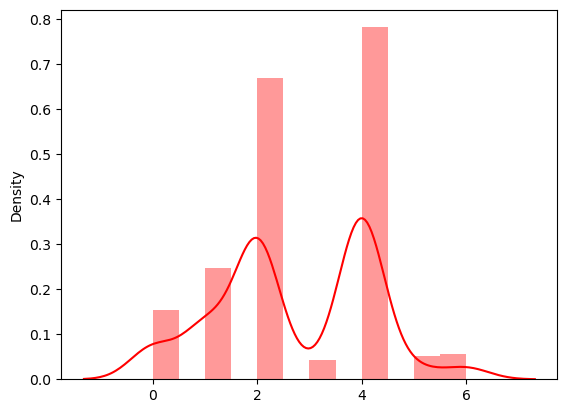

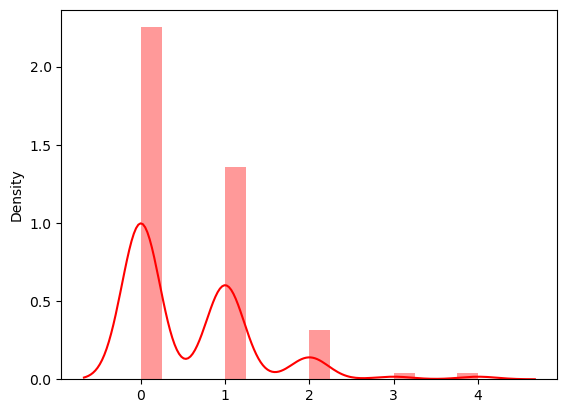

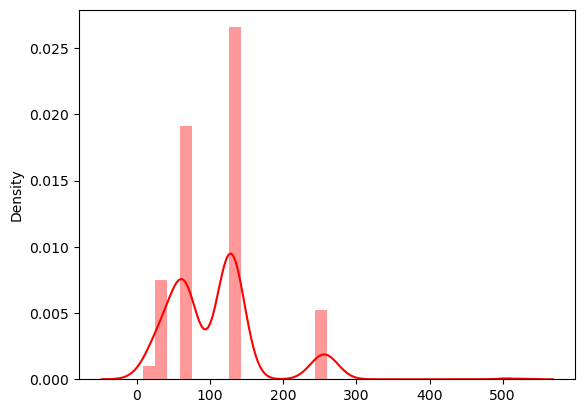

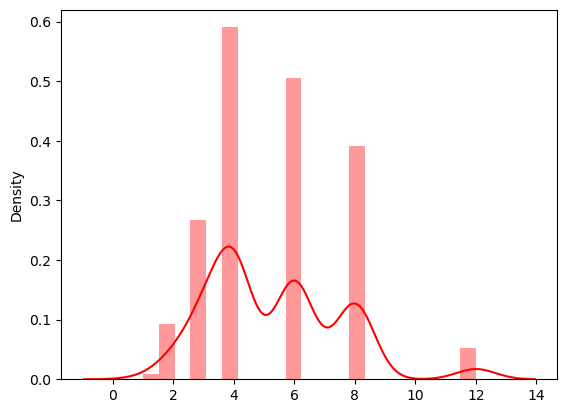

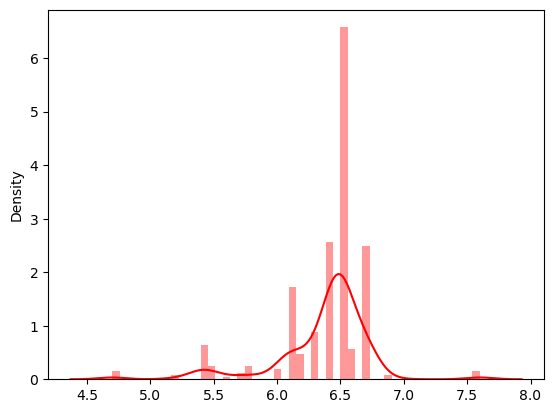

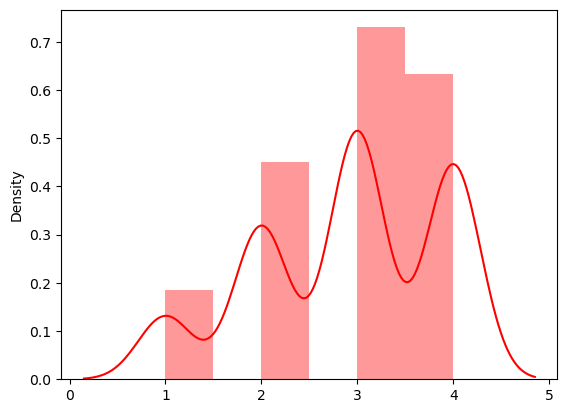

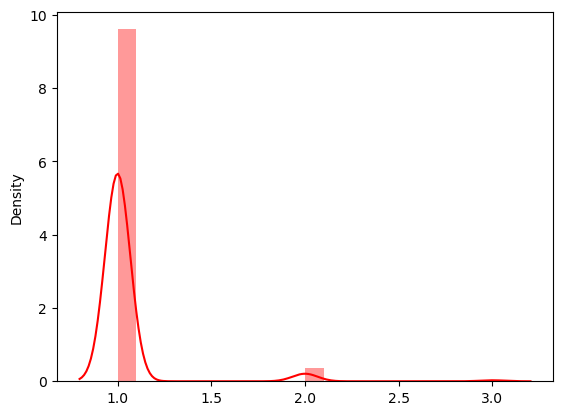

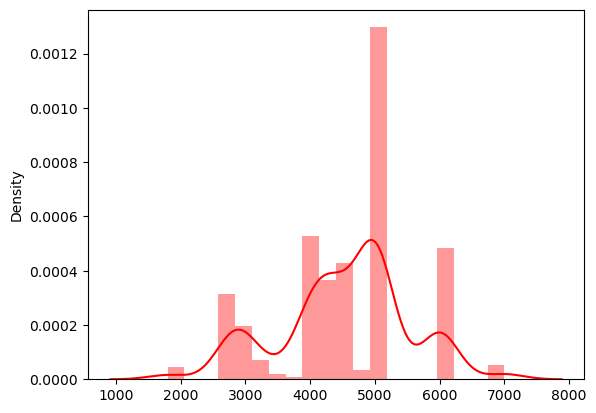

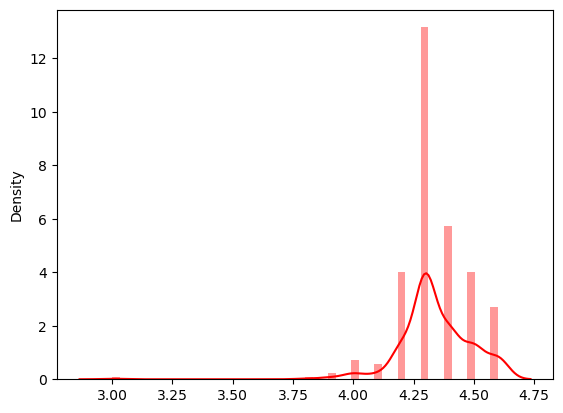

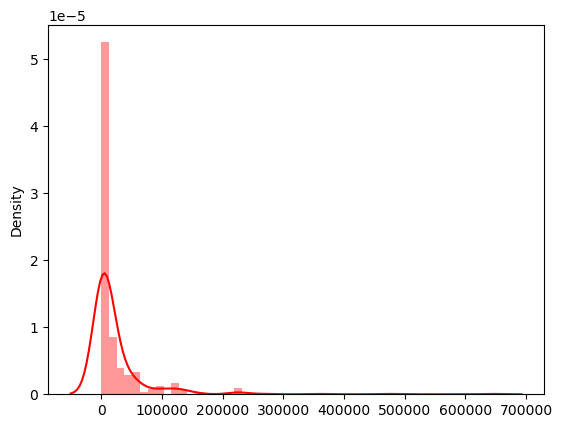

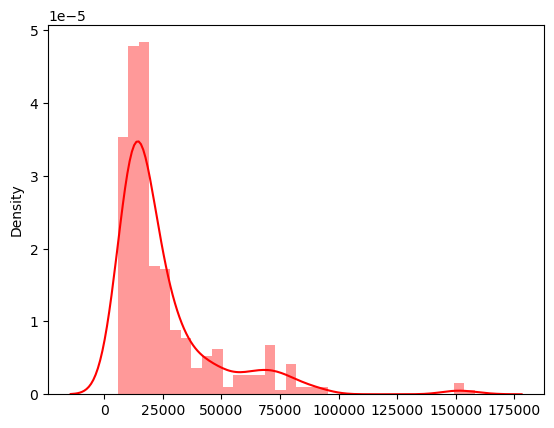

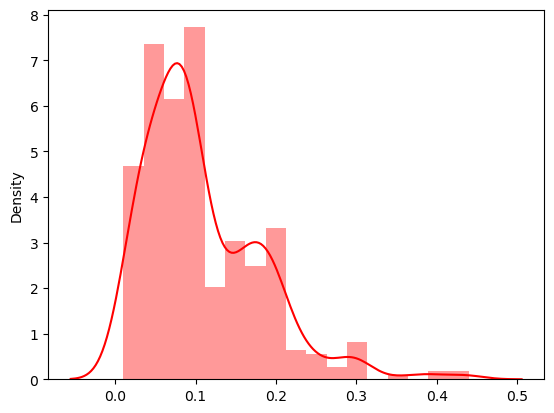

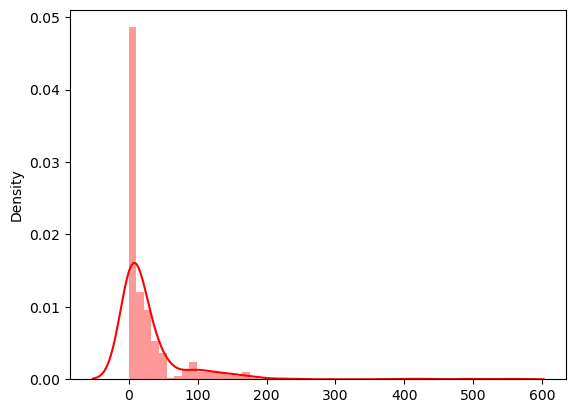

In [15]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.distplot(x=data[i],color='red')
        plt.show()

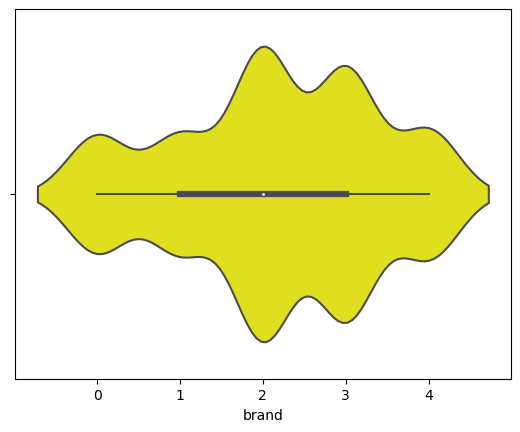

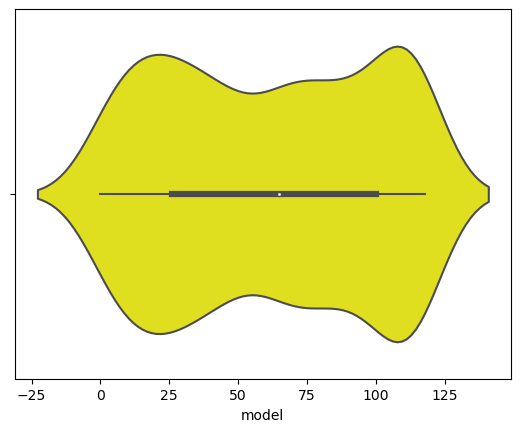

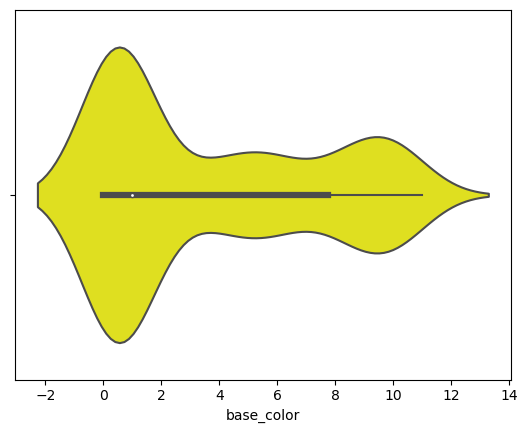

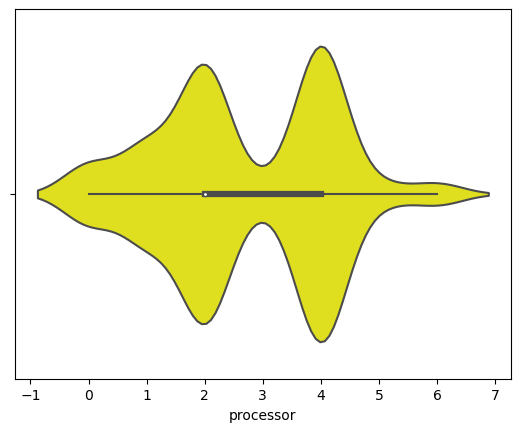

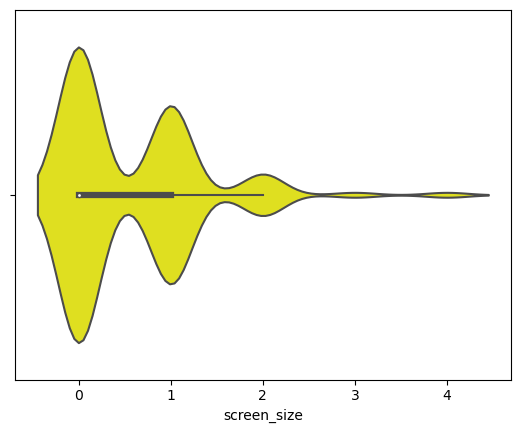

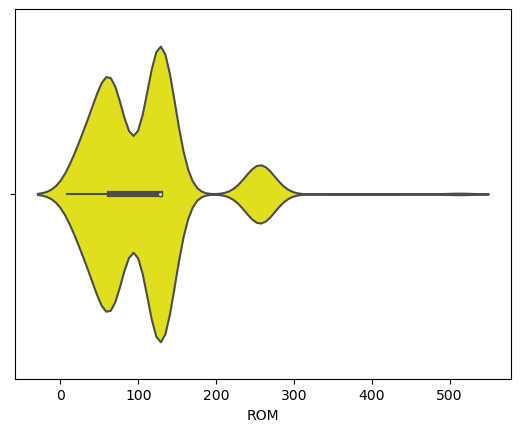

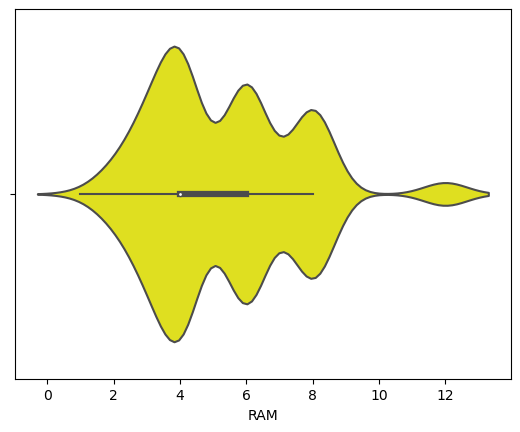

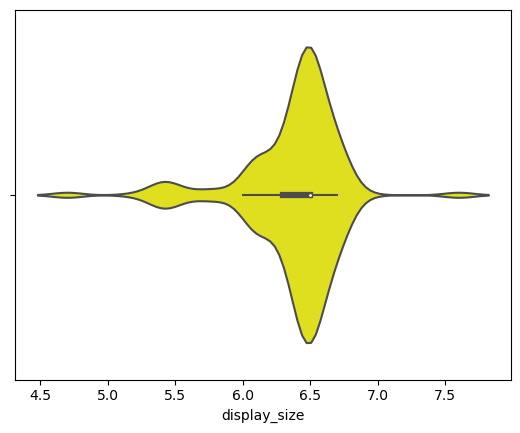

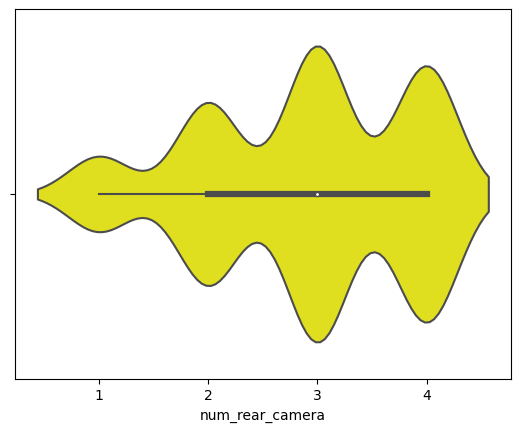

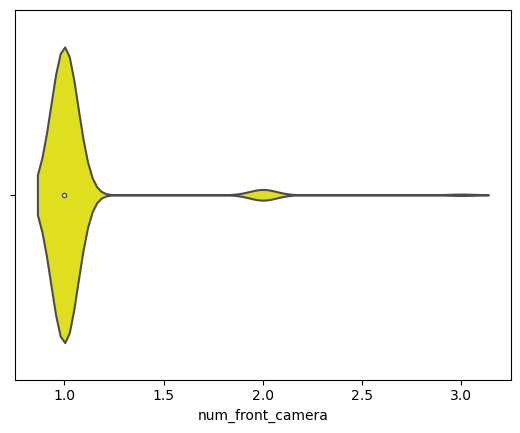

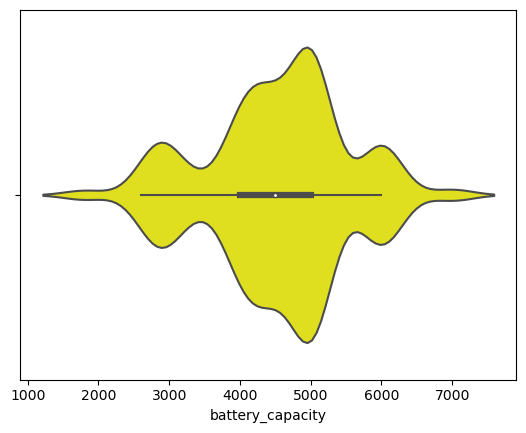

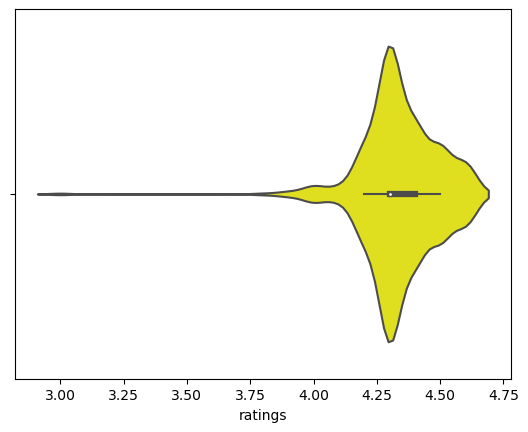

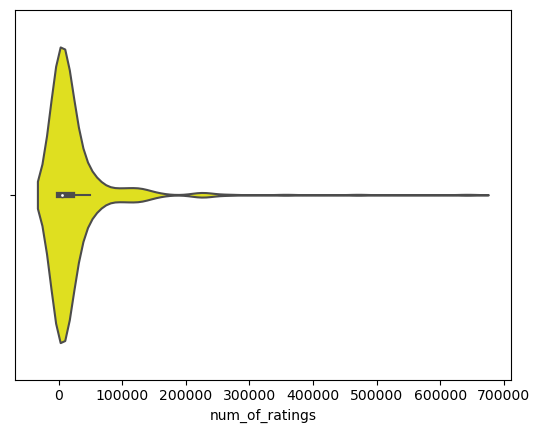

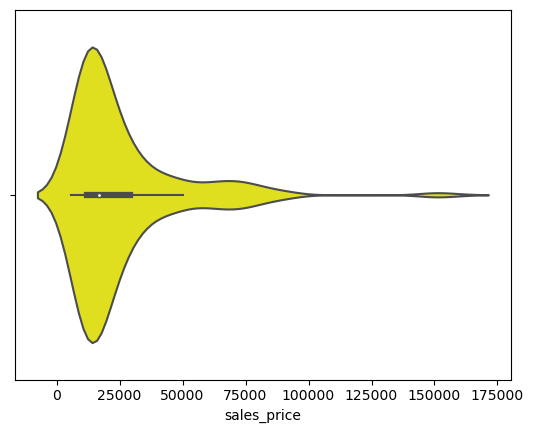

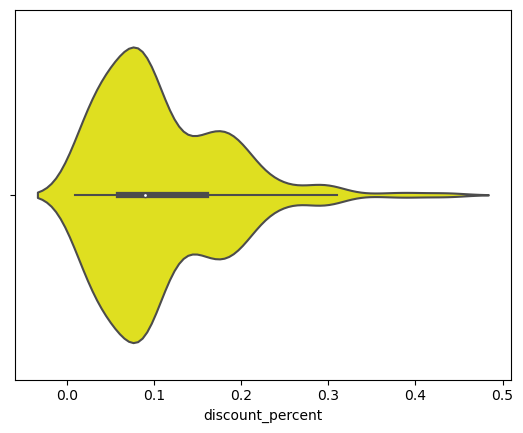

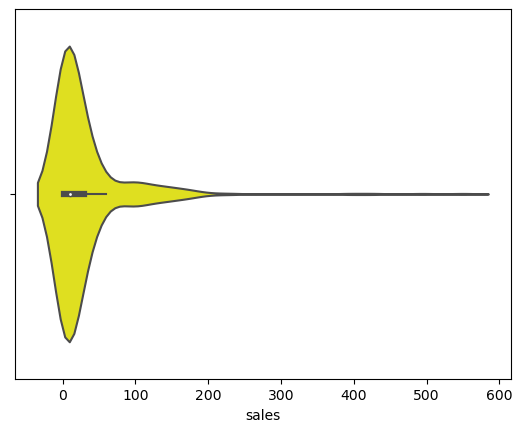

In [16]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.violinplot(x=data[i],color='yellow')
        plt.show()

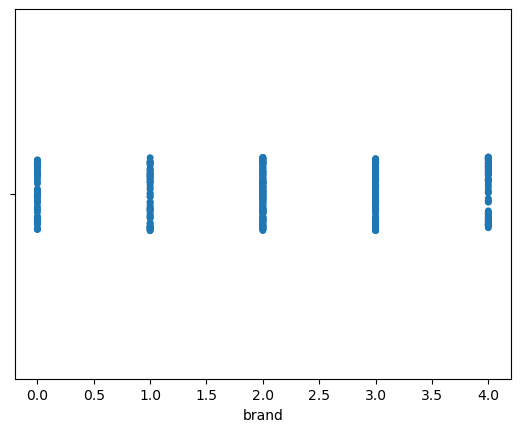

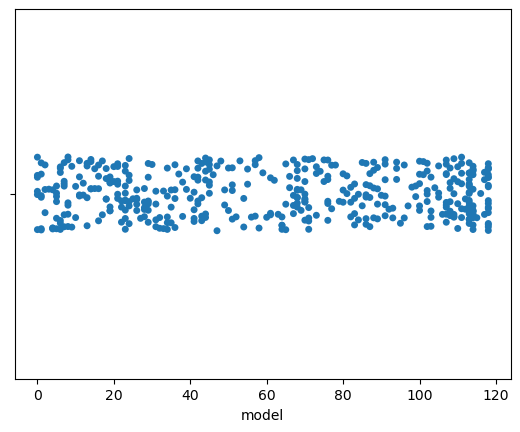

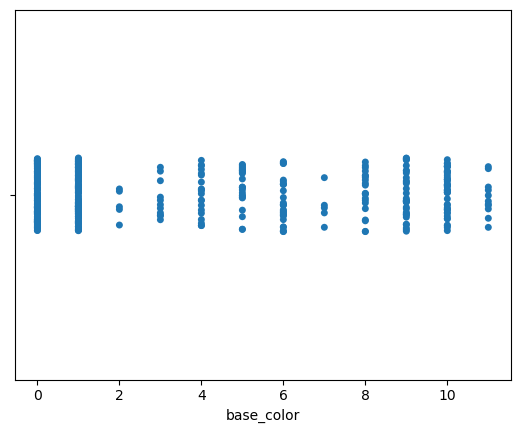

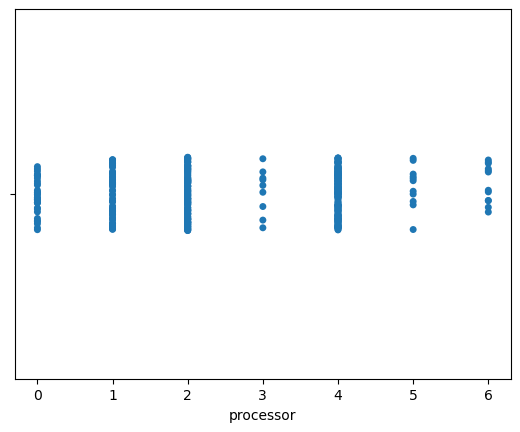

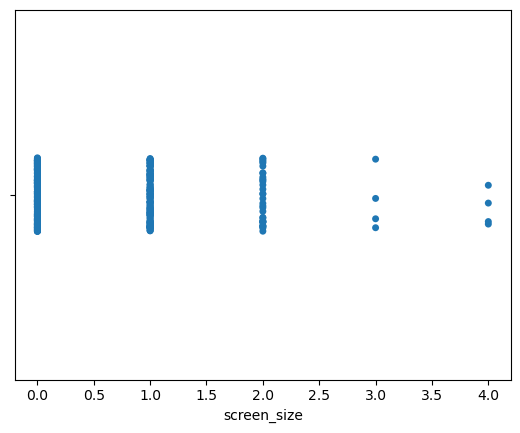

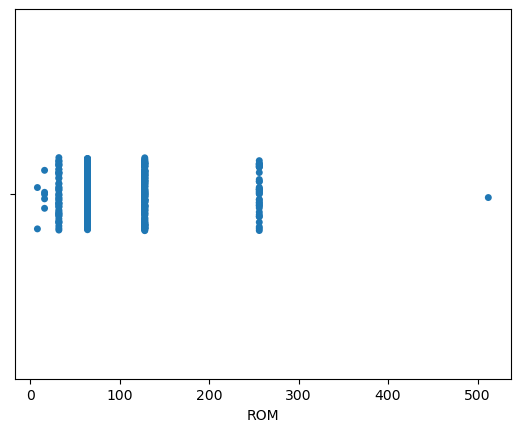

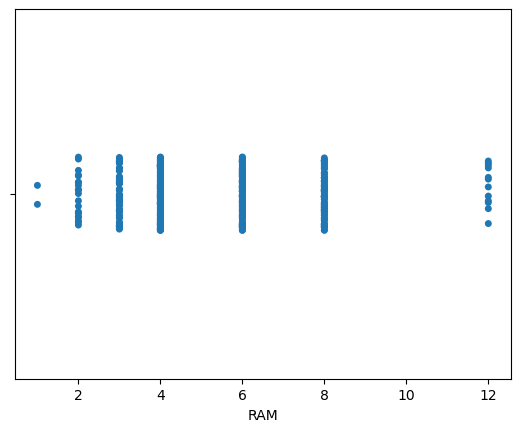

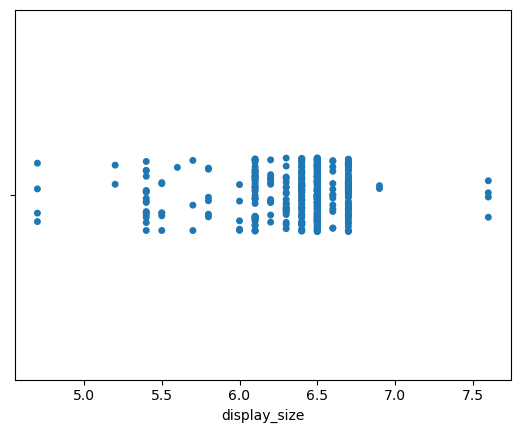

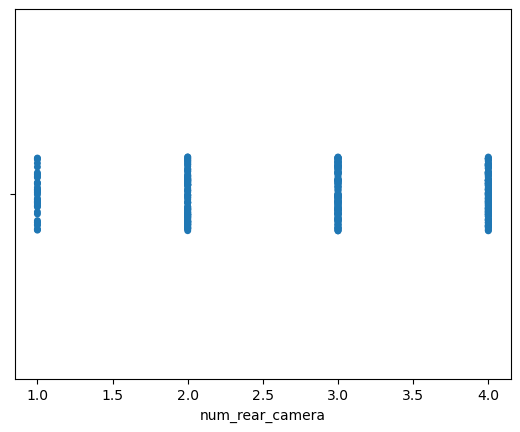

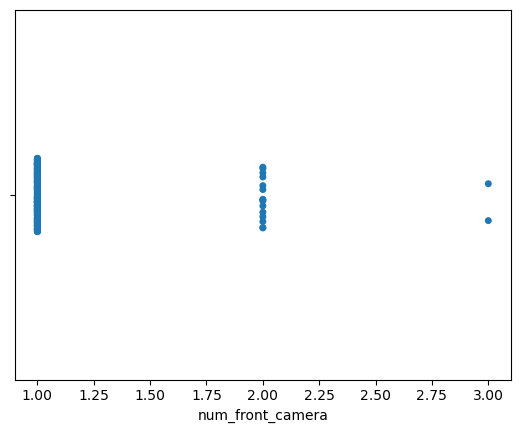

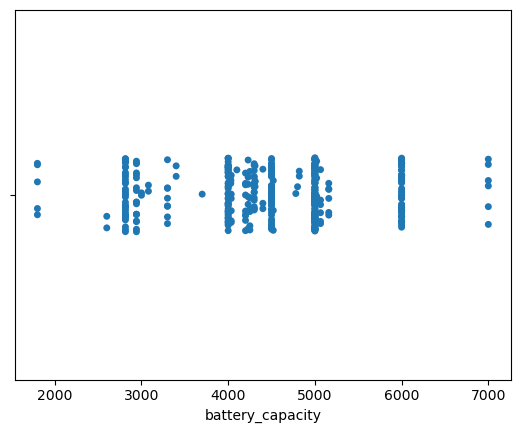

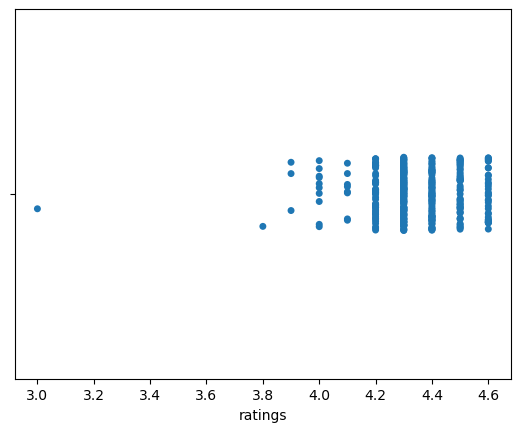

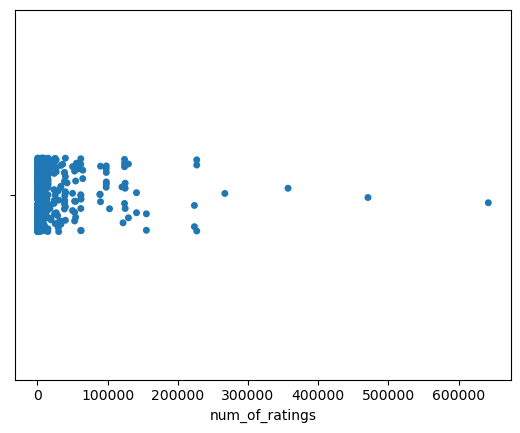

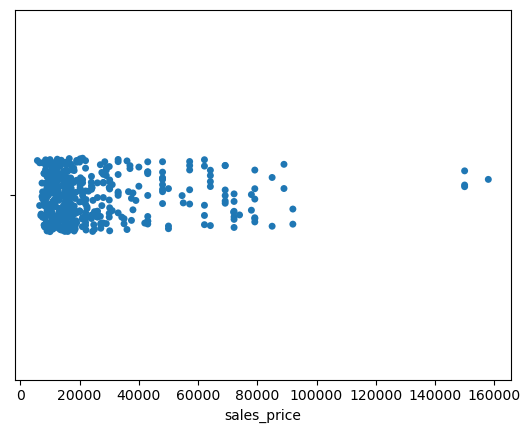

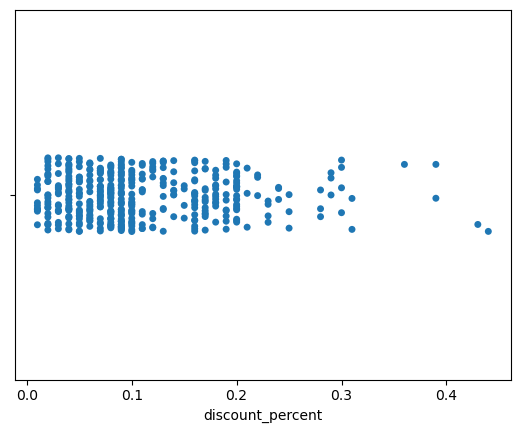

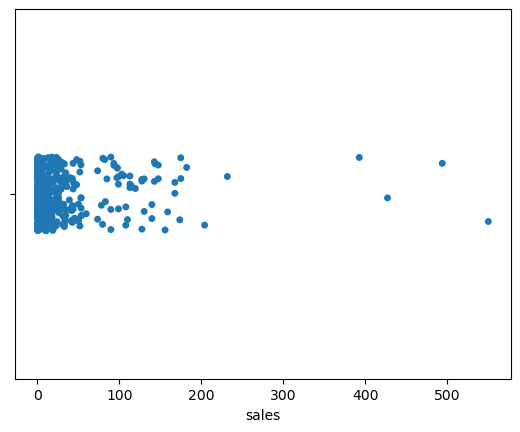

In [17]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.stripplot(x=data[i])
        plt.show()

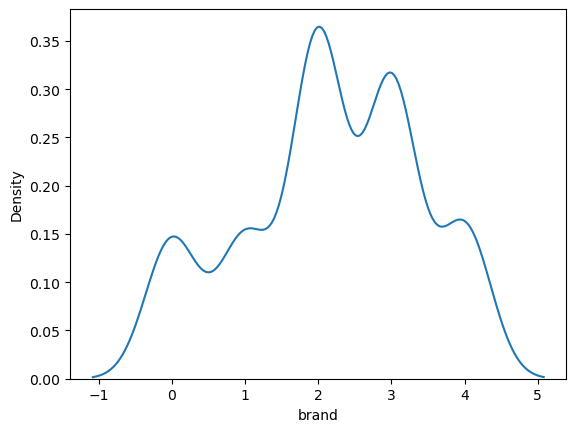

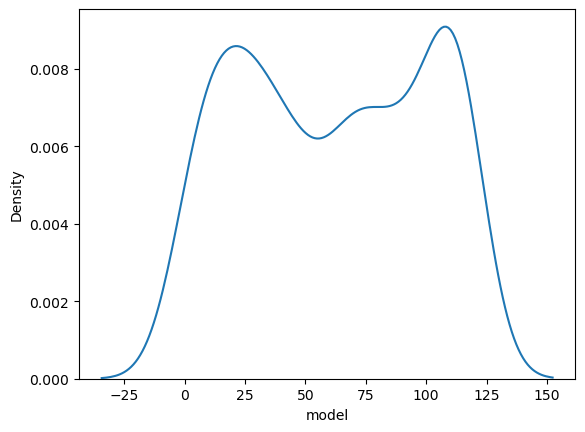

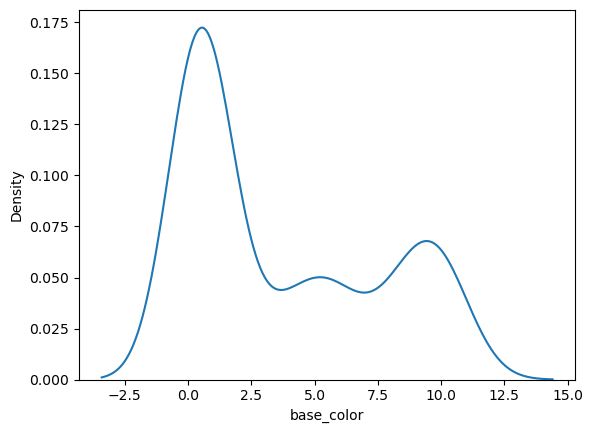

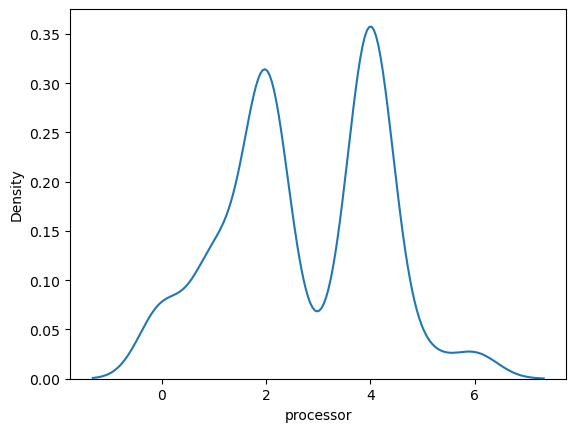

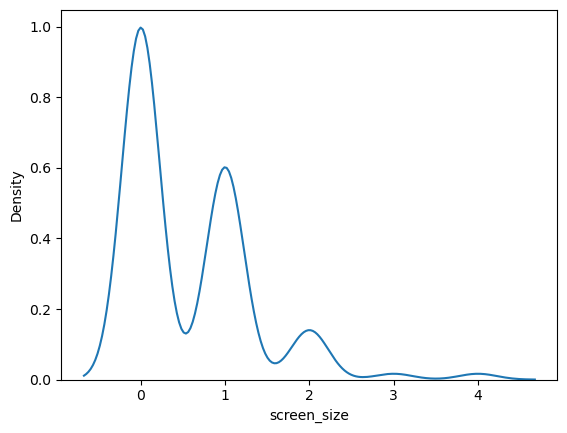

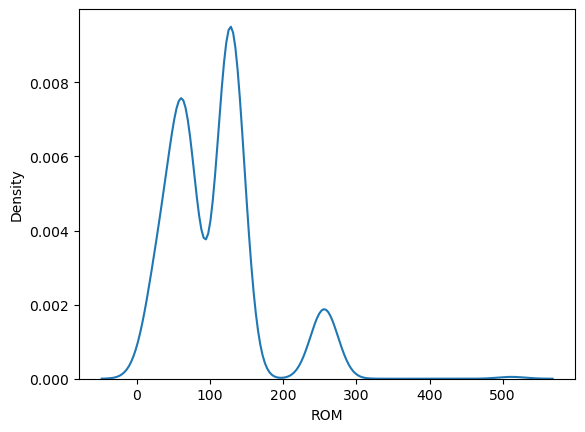

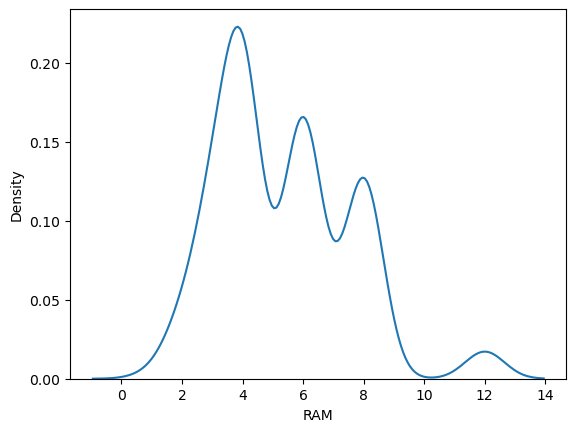

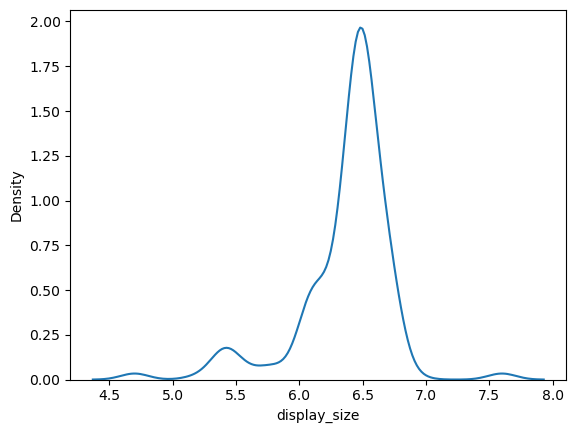

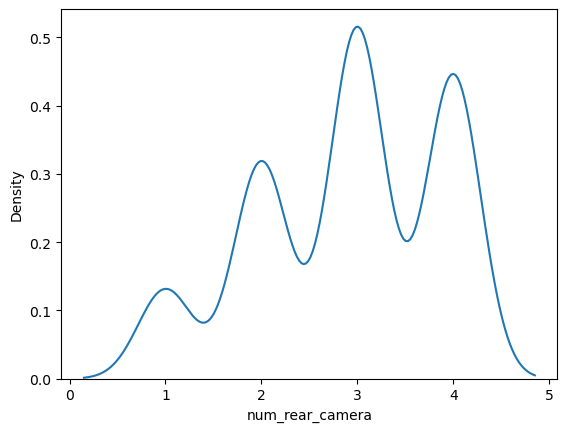

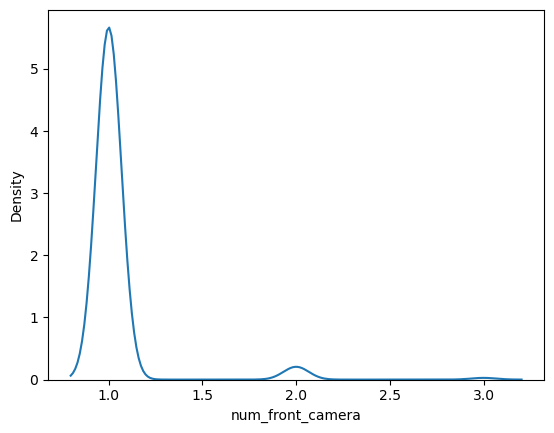

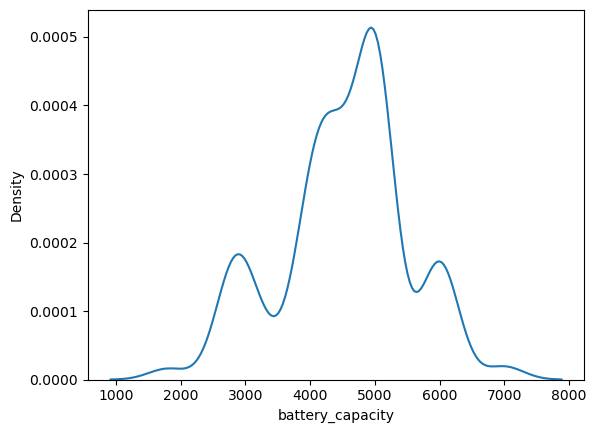

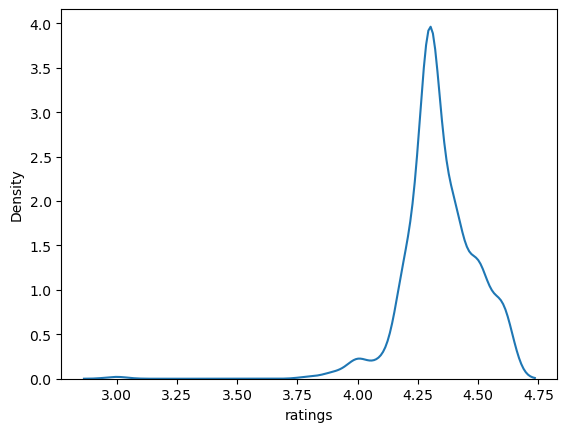

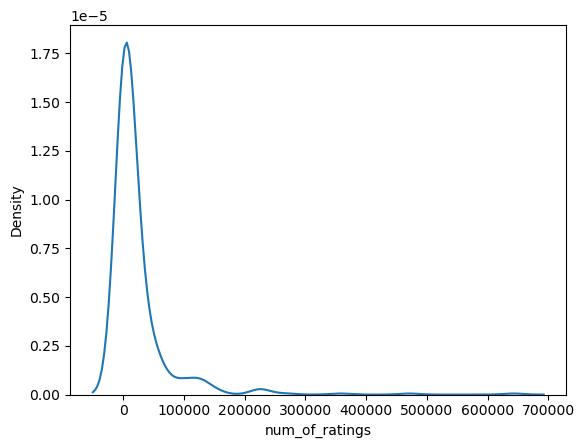

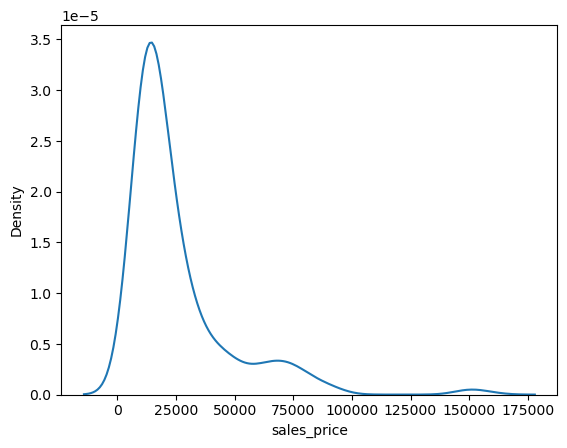

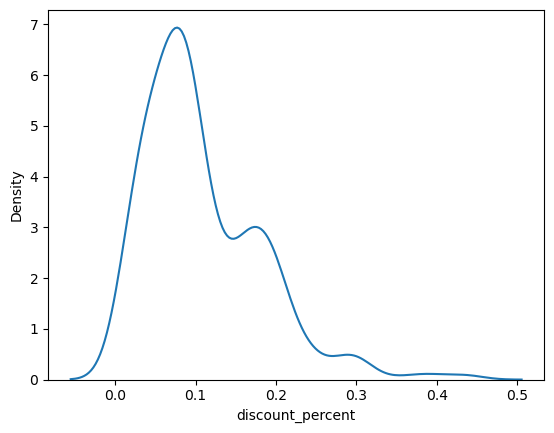

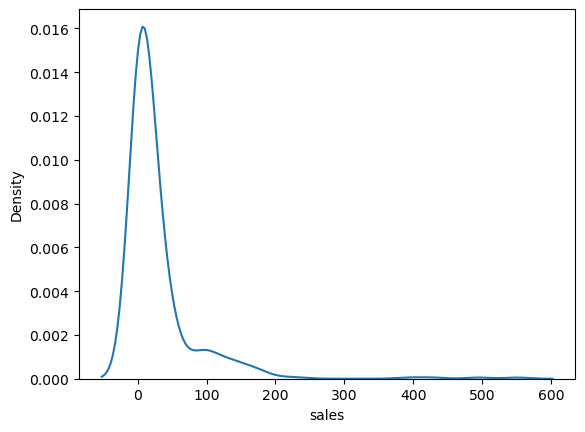

In [18]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x=data[i])
        plt.show()

## Multivariate Analysis

## Pie plot

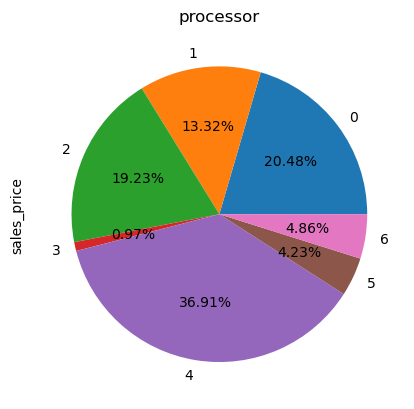

In [19]:
plt.title("processor")
rom_price=data.groupby(['processor'])['sales_price'].sum()
rom_price.plot.pie(autopct= '%1.2f%%');

ValueError: 'explode' must be of length 'x'

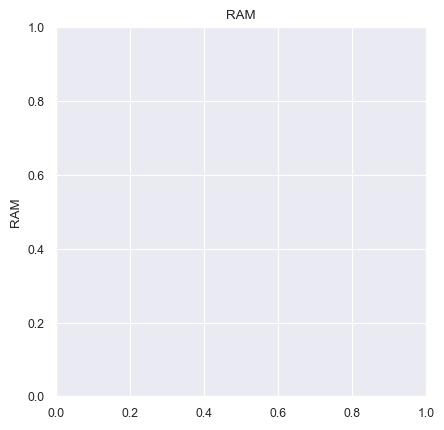

In [53]:
plt.title("RAM")
myexplode=[.1,0,.2,0.4,.6,.8,0.7]
rams=data.RAM.value_counts().plot.pie(autopct="%1.2f%%",explode=myexplode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show();

## Pair plot

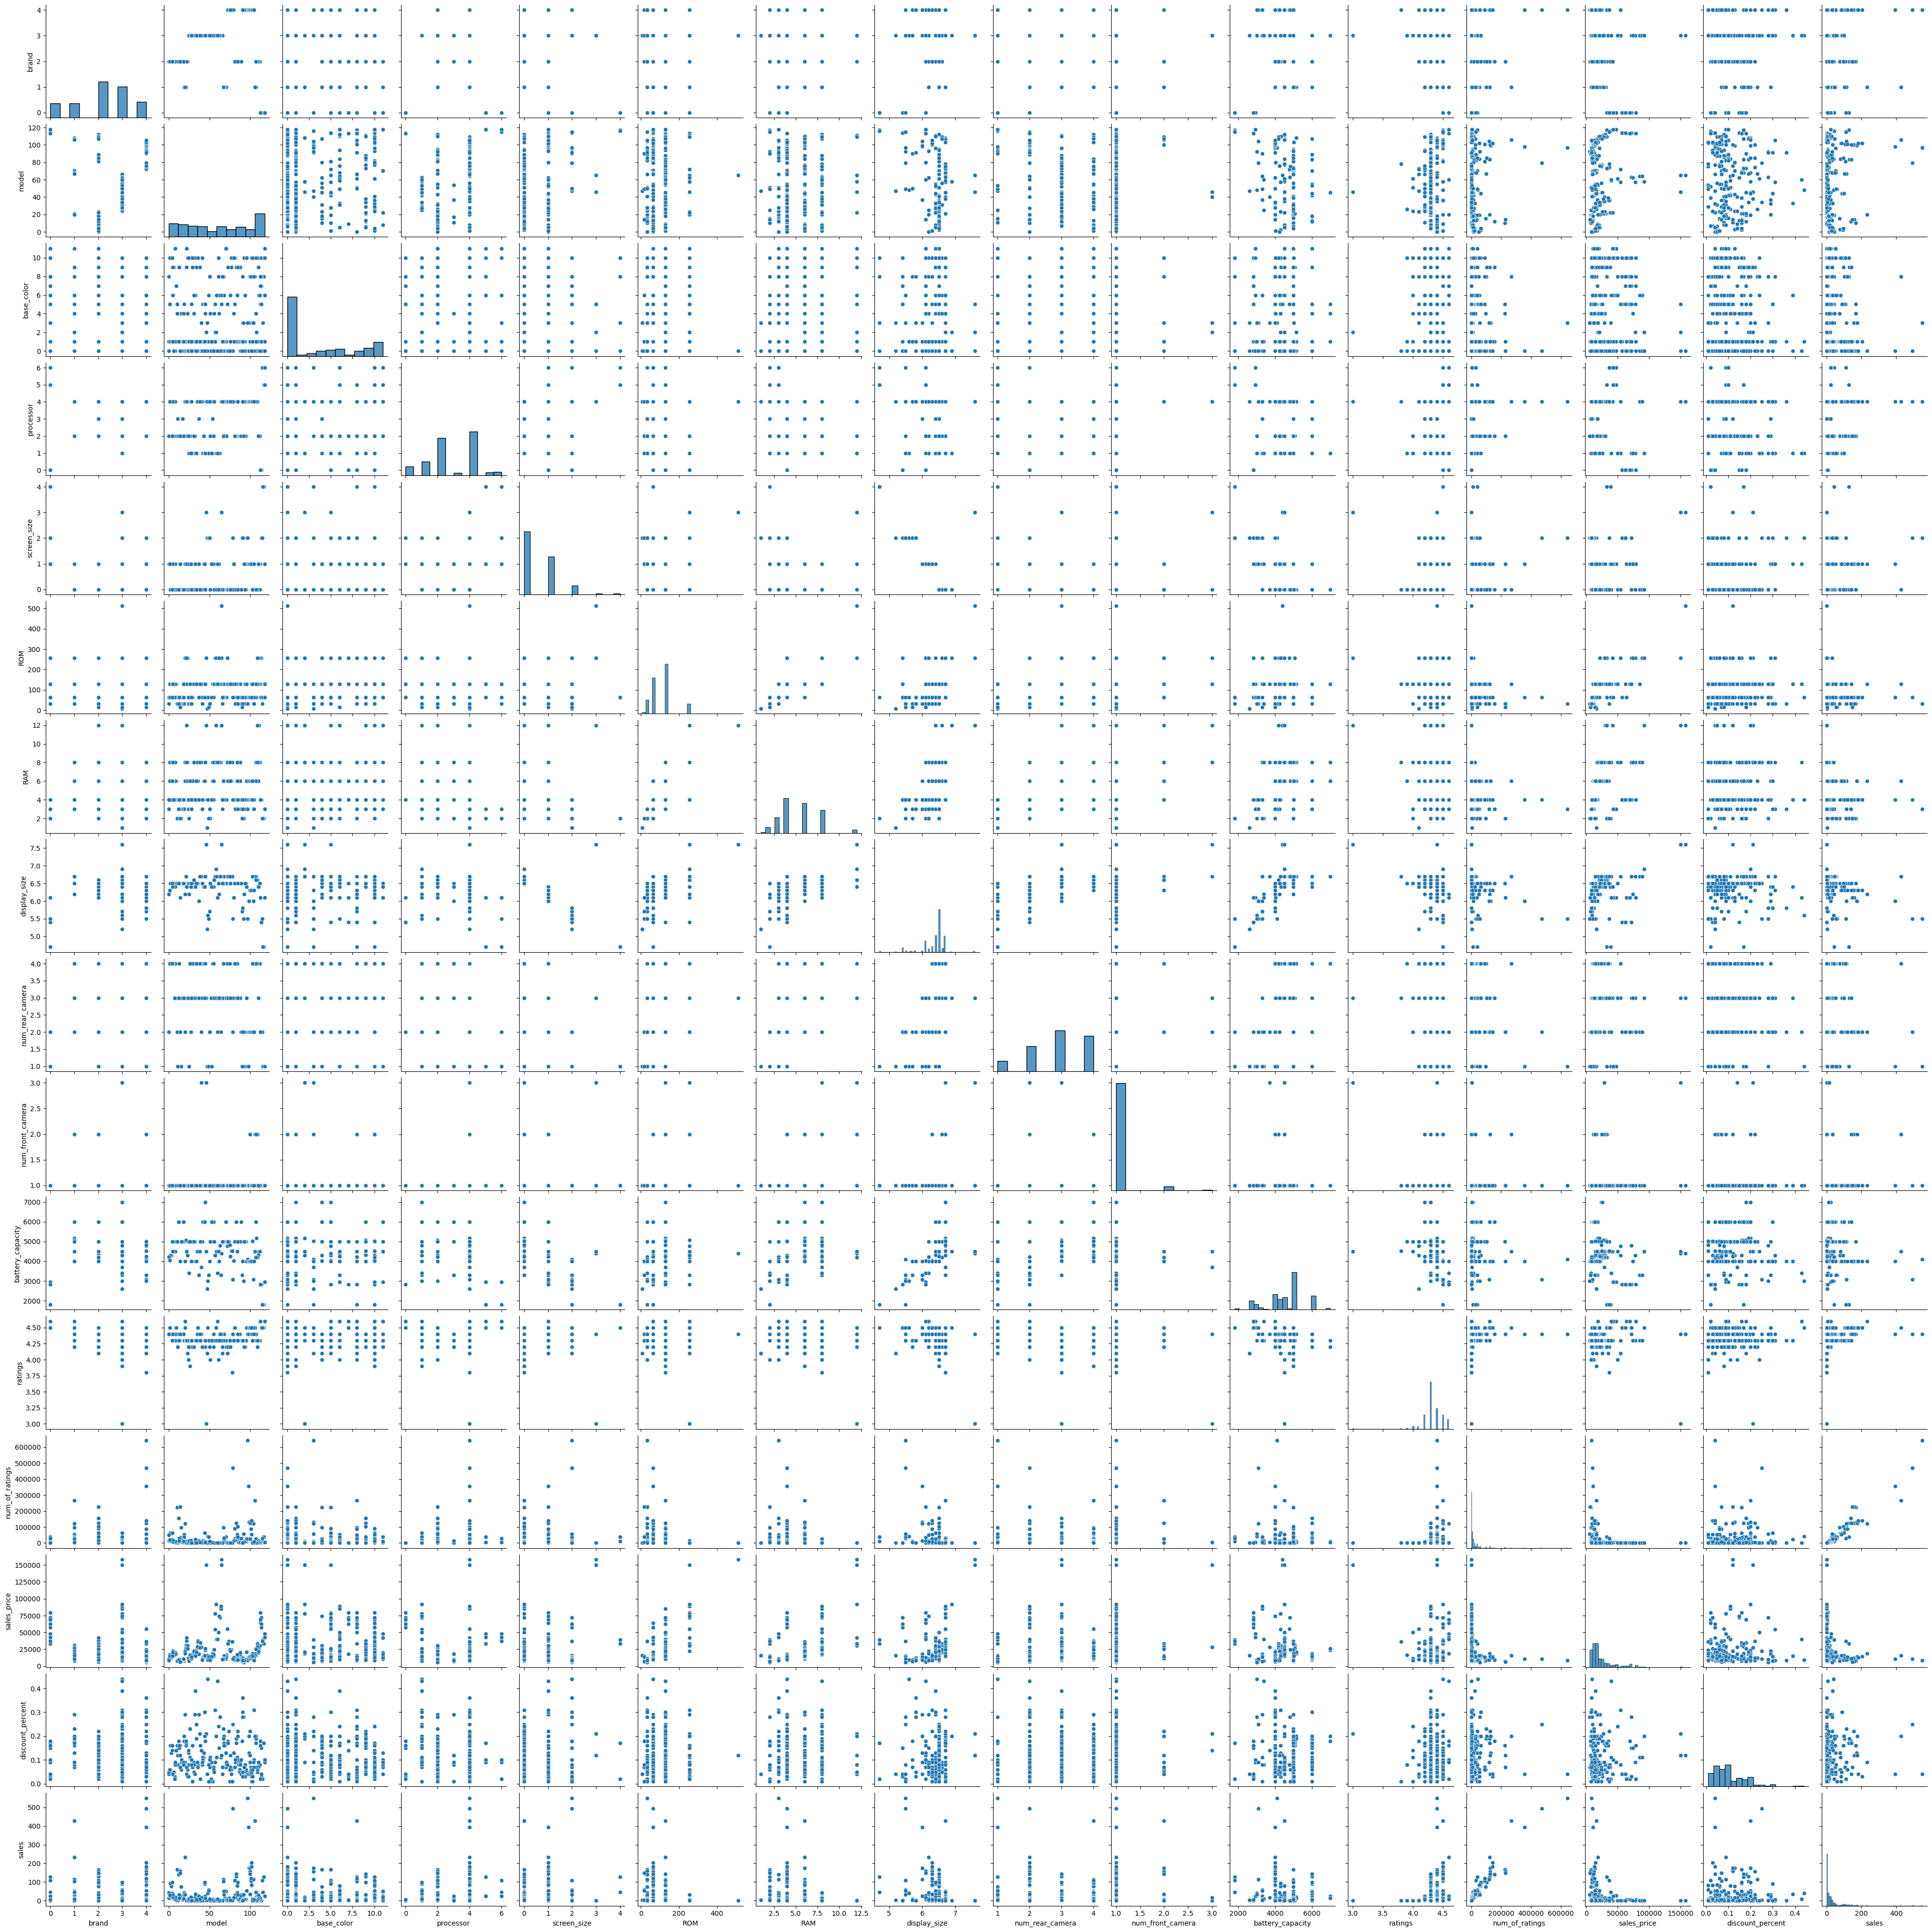

In [21]:
sns.pairplot(data=data)
plt.show()

## Count plot

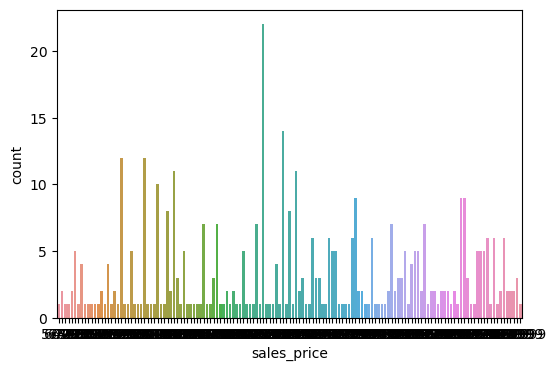

In [22]:
plt.figure(figsize=(6,4))
sns.countplot('sales_price',data=data);
plt.show()

## Lineplots

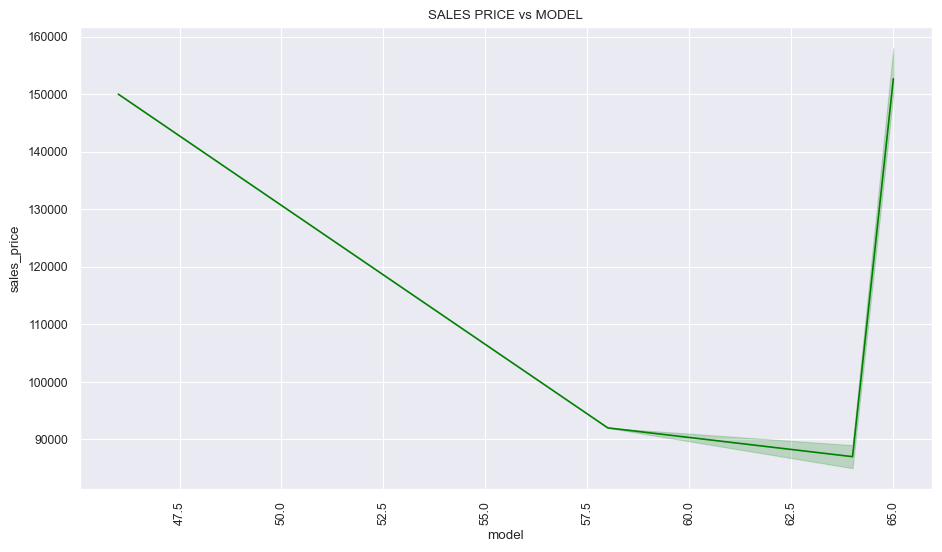

In [23]:
plt.figure(figsize=(11,6))
sns.set_style('dark')
sns.set_theme('paper')
sns.lineplot(x='model',y='sales_price',data=data.sort_values(by='sales_price',ascending=False)[:10],color='green')
plt.xticks(rotation=90)
plt.title(('SALES PRICE vs MODEL'))
plt
plt.show()

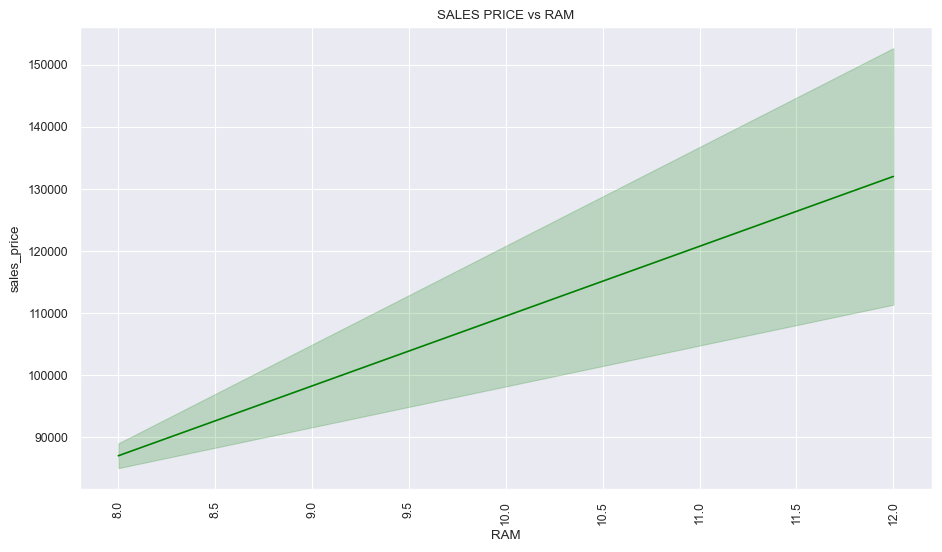

In [24]:
plt.figure(figsize=(11,6))
sns.set_style('dark')
sns.set_theme('paper')
sns.lineplot(x='RAM',y='sales_price',data=data.sort_values(by='sales_price',ascending=False)[:10],color='green')
plt.xticks(rotation=90)
plt.title(('SALES PRICE vs RAM'))
plt
plt.show()

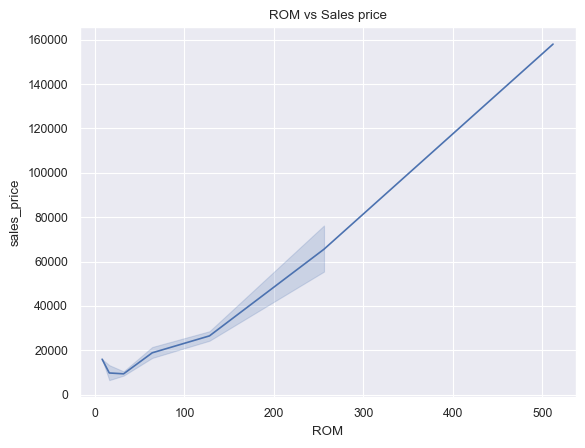

In [25]:
plt.title("ROM vs Sales price")
sns.lineplot('ROM','sales_price',data=data);
plt.show()

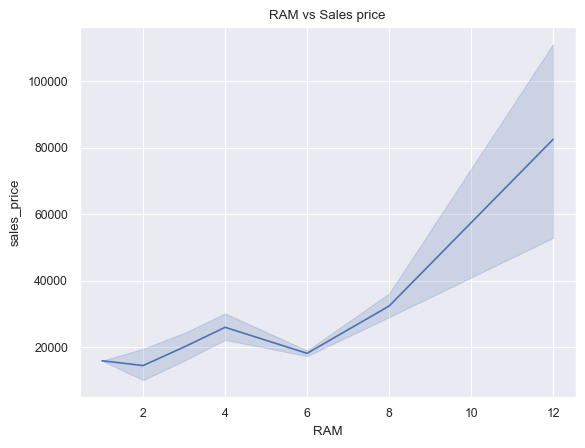

In [26]:
plt.title("RAM vs Sales price")
sns.lineplot('RAM','sales_price',data=data);
plt.show()

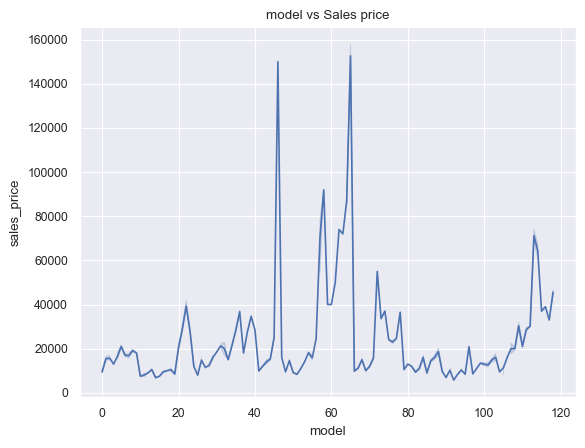

In [27]:
plt.title("model vs Sales price")
sns.lineplot('model','sales_price',data=data);
plt.show()

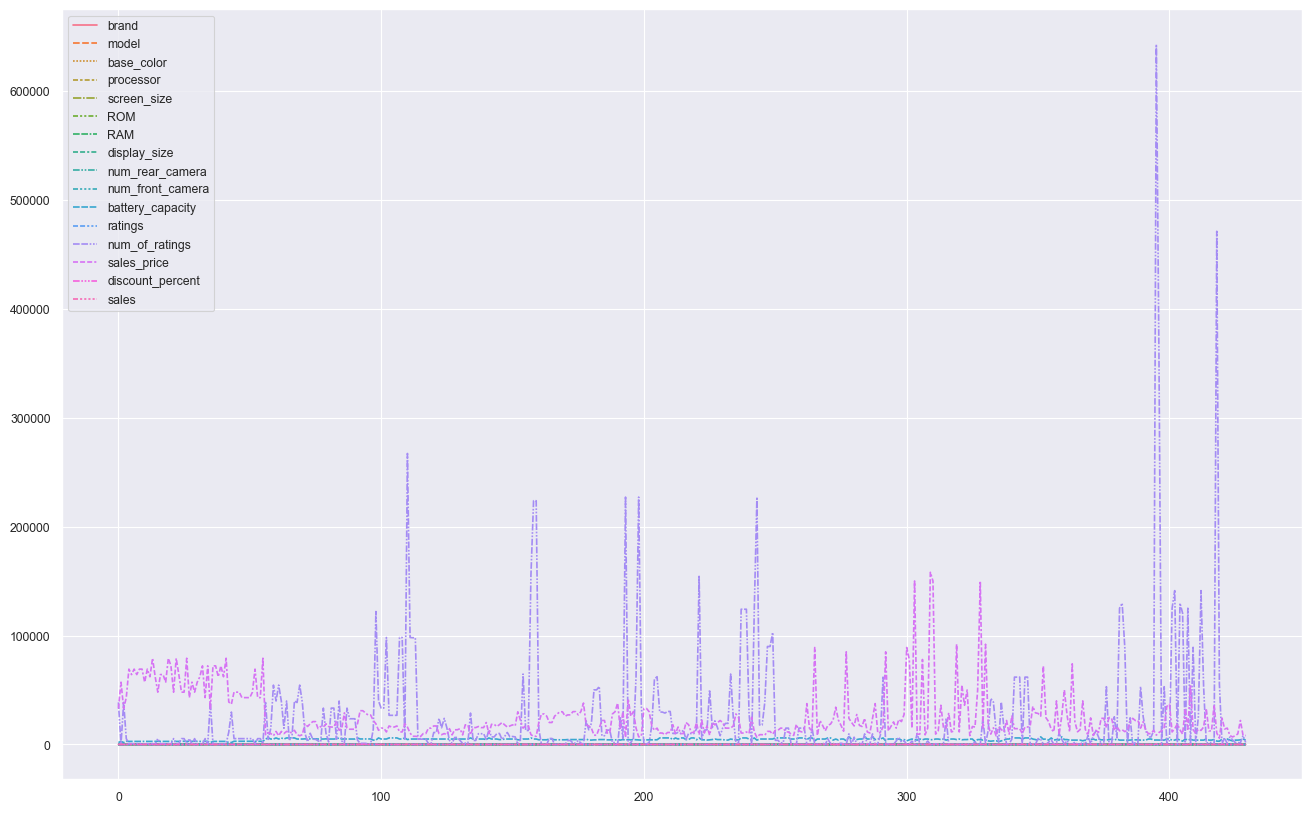

In [28]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data);

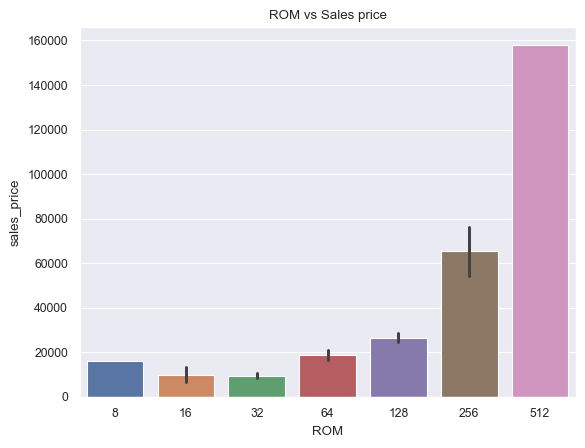

In [29]:
plt.title("ROM vs Sales price")
sns.barplot(x='ROM',y='sales_price',data=data);

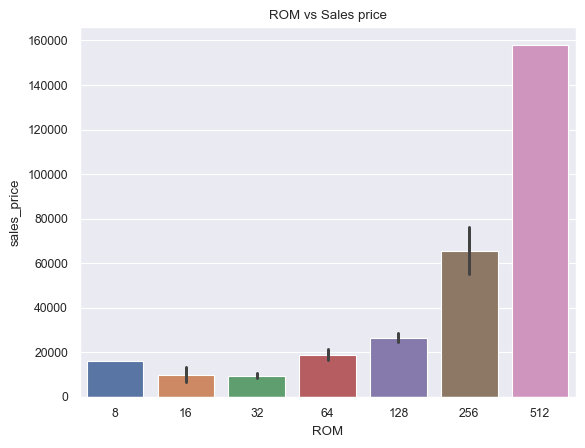

In [30]:
plt.title("ROM vs Sales price")
sns.barplot(x='ROM',y='sales_price',data=data);

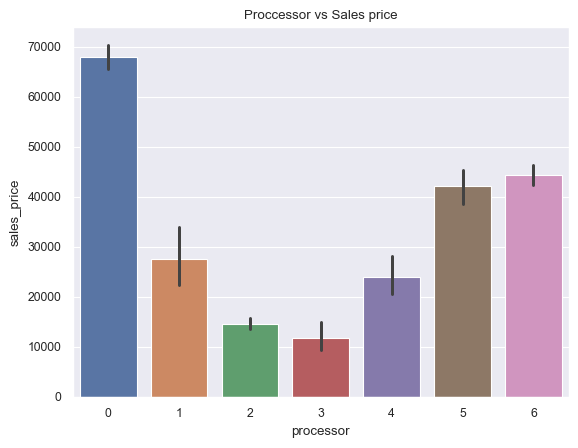

In [31]:
plt.title("Proccessor vs Sales price")
sns.barplot(x='processor',y='sales_price',data=data);

brand                  AxesSubplot(0.125,0.11;0.0407895x0.77)
model               AxesSubplot(0.173947,0.11;0.0407895x0.77)
base_color          AxesSubplot(0.222895,0.11;0.0407895x0.77)
processor           AxesSubplot(0.271842,0.11;0.0407895x0.77)
screen_size         AxesSubplot(0.320789,0.11;0.0407895x0.77)
ROM                 AxesSubplot(0.369737,0.11;0.0407895x0.77)
RAM                 AxesSubplot(0.418684,0.11;0.0407895x0.77)
display_size        AxesSubplot(0.467632,0.11;0.0407895x0.77)
num_rear_camera     AxesSubplot(0.516579,0.11;0.0407895x0.77)
num_front_camera    AxesSubplot(0.565526,0.11;0.0407895x0.77)
battery_capacity    AxesSubplot(0.614474,0.11;0.0407895x0.77)
ratings             AxesSubplot(0.663421,0.11;0.0407895x0.77)
num_of_ratings      AxesSubplot(0.712368,0.11;0.0407895x0.77)
sales_price         AxesSubplot(0.761316,0.11;0.0407895x0.77)
discount_percent    AxesSubplot(0.810263,0.11;0.0407895x0.77)
sales               AxesSubplot(0.859211,0.11;0.0407895x0.77)
dtype: o

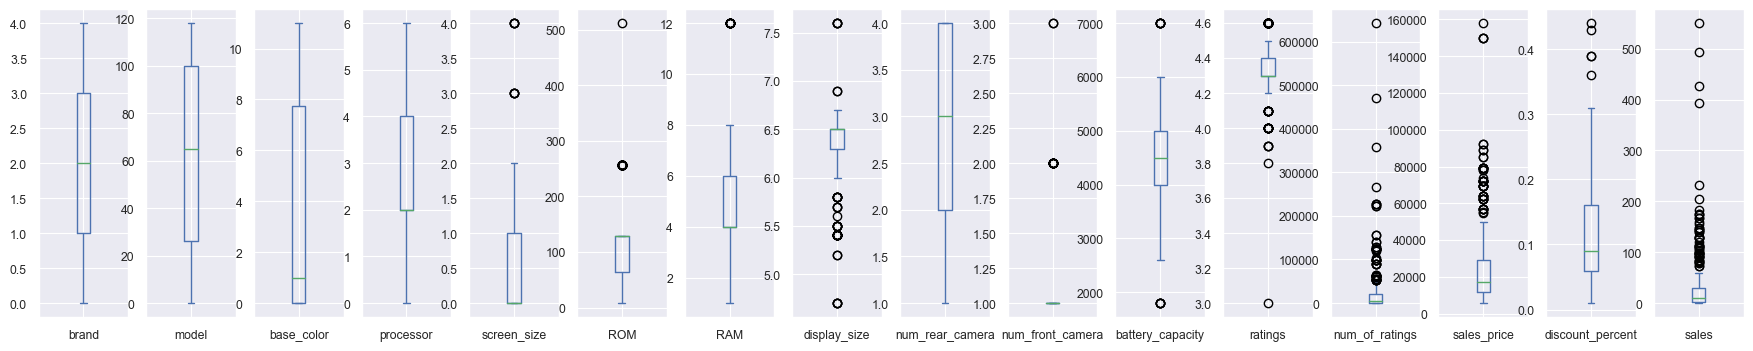

In [32]:
data.plot.box(figsize=(22,4),subplots=True)

# OUTLIER TREATMENT

## BOXPLOT

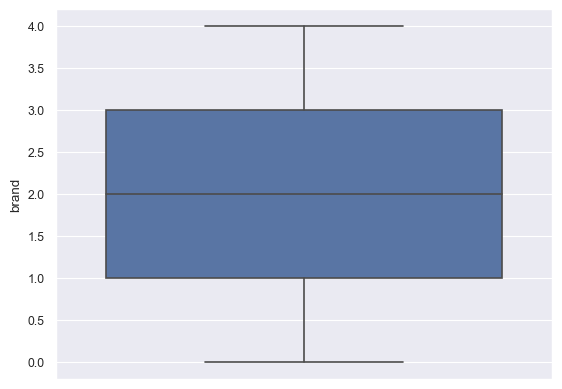

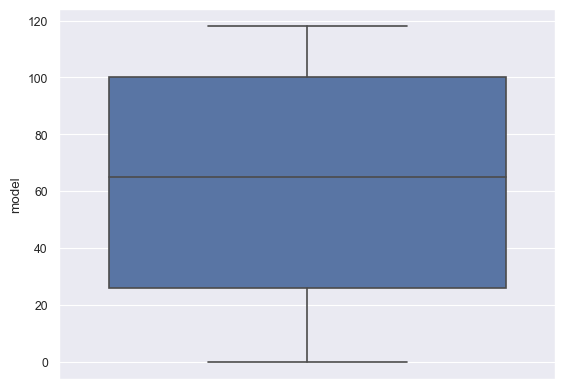

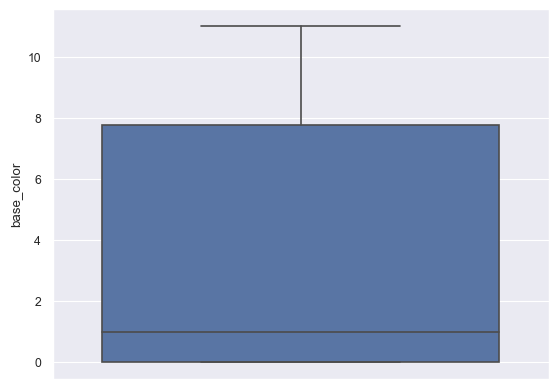

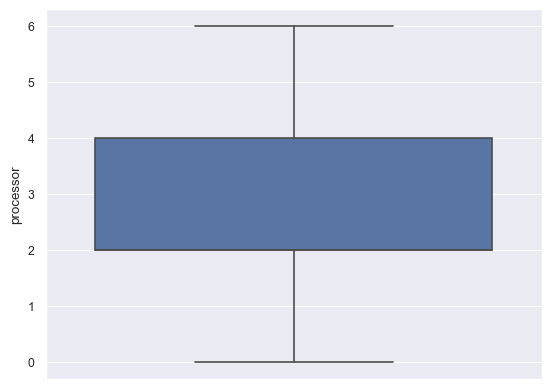

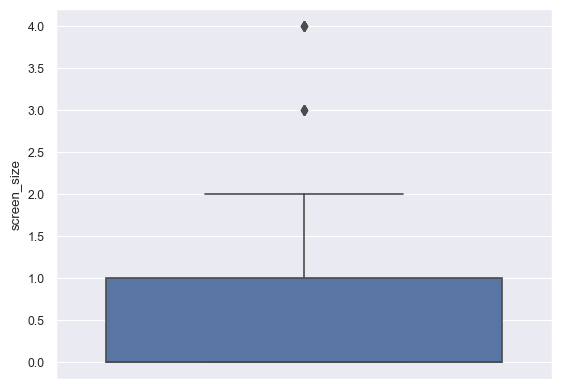

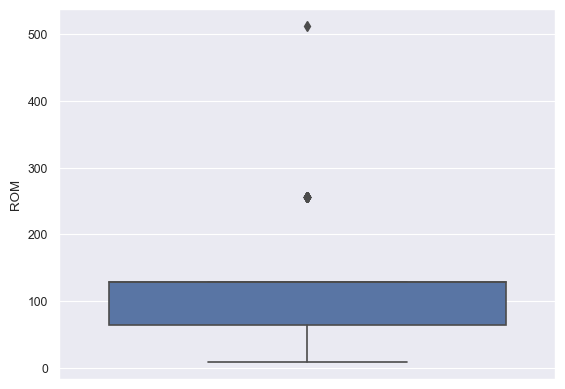

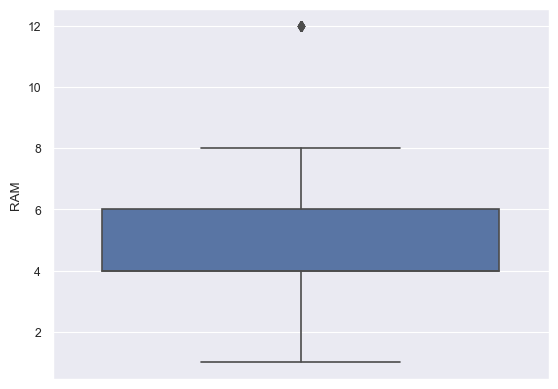

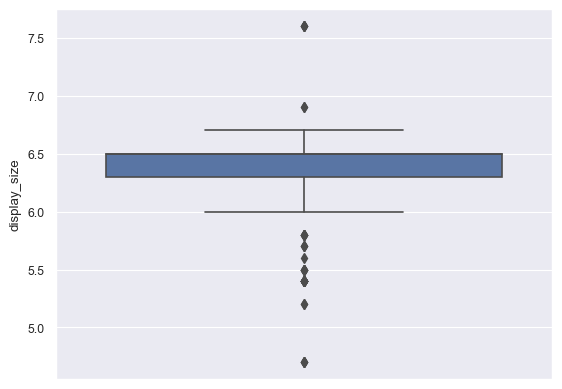

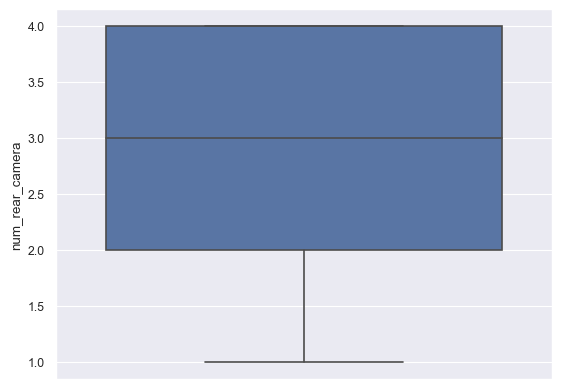

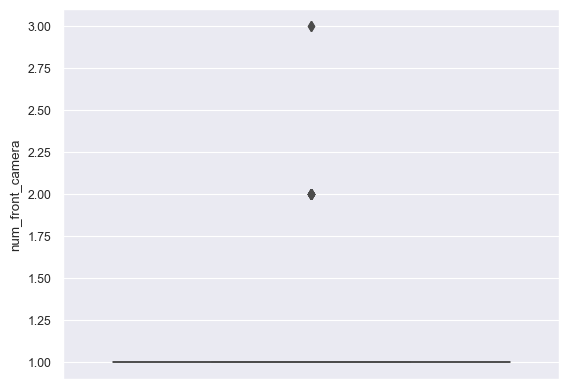

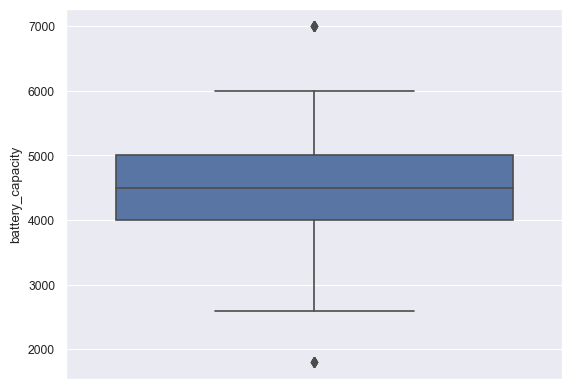

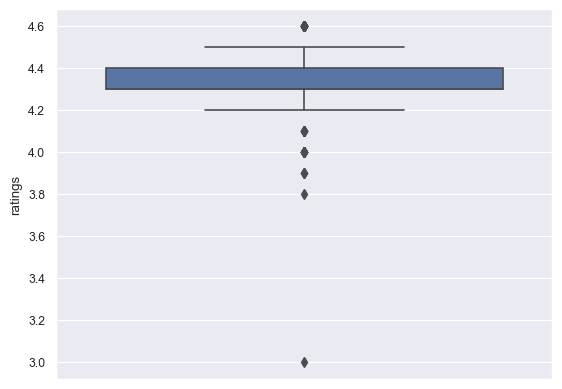

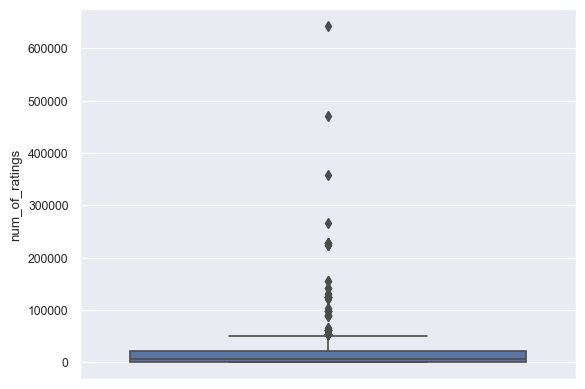

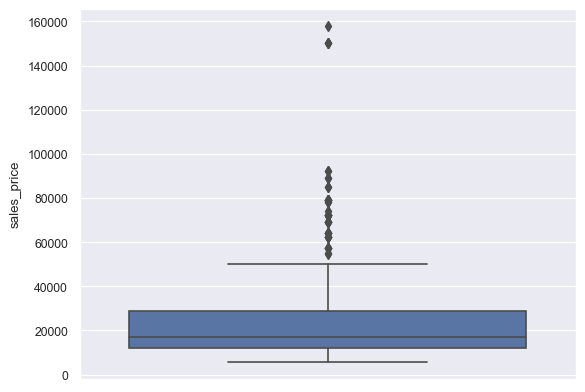

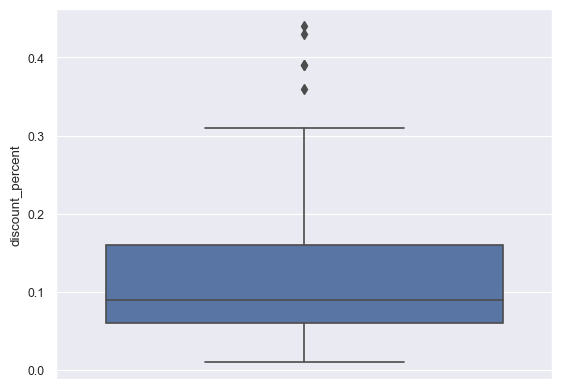

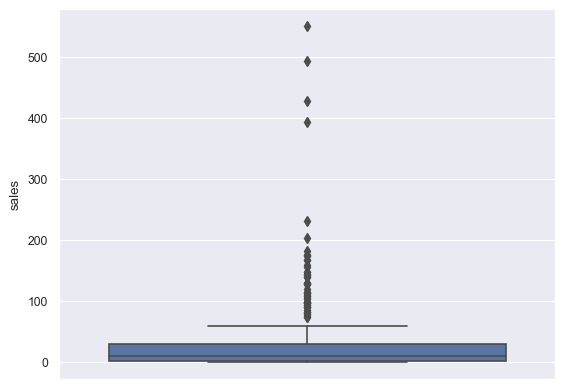

In [33]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i])
        plt.show()

## SETTING OUTLIER LIMITS

In [34]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL


In [35]:
for column in data.columns:
    if data[column].dtype !="object":
        UL, LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

In [36]:
data.dropna(inplace=True)

### LETS PLOTT THE BOXPLOT AGAIN TO SEE THE DIFFRENCE

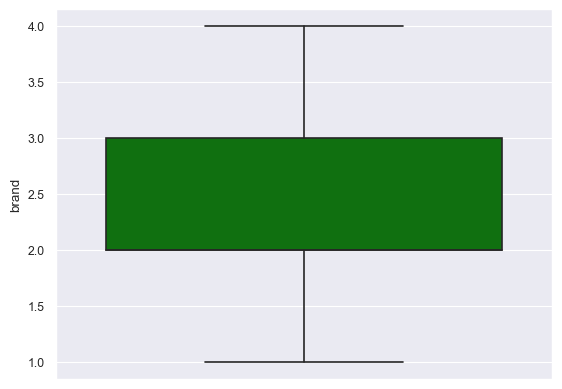

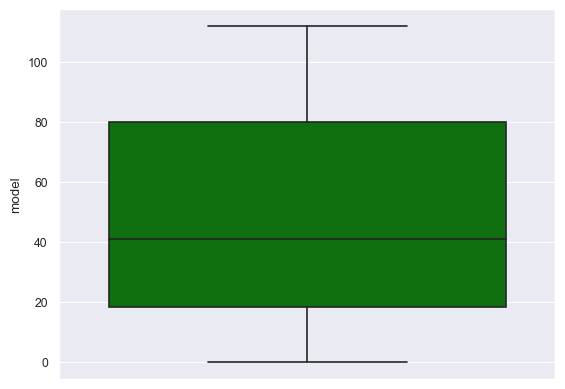

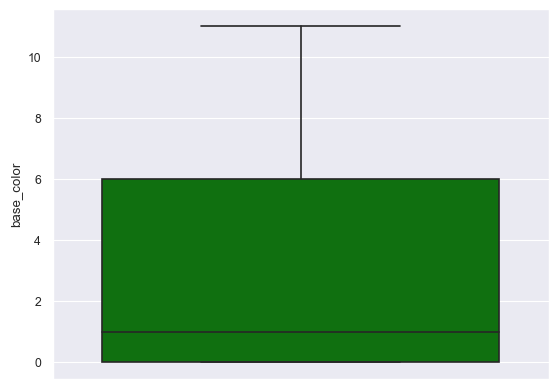

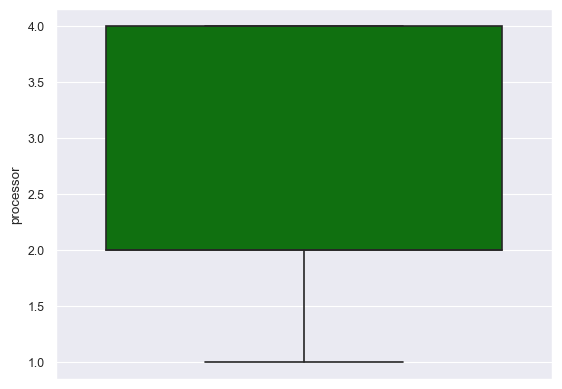

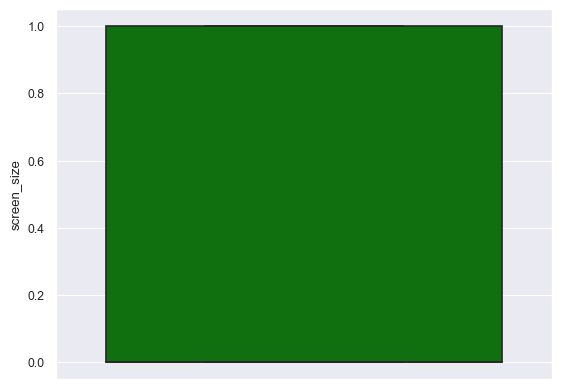

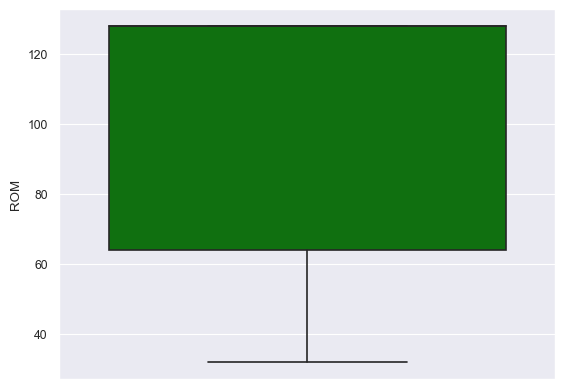

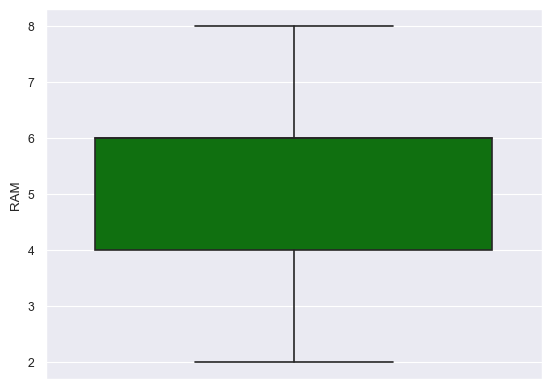

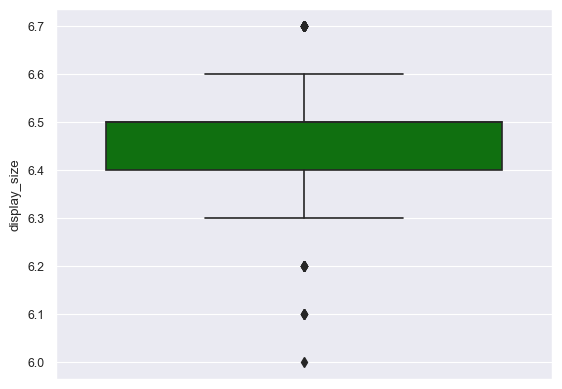

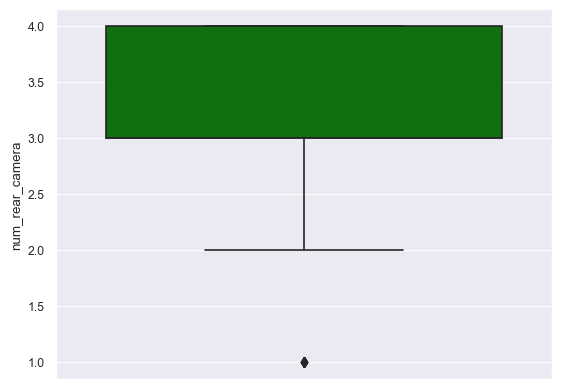

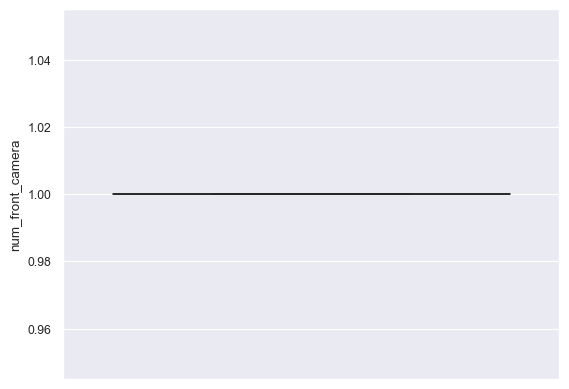

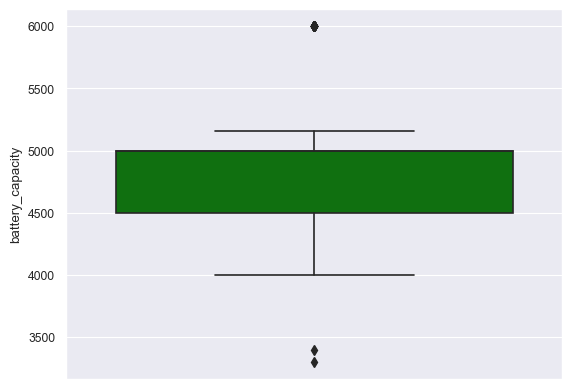

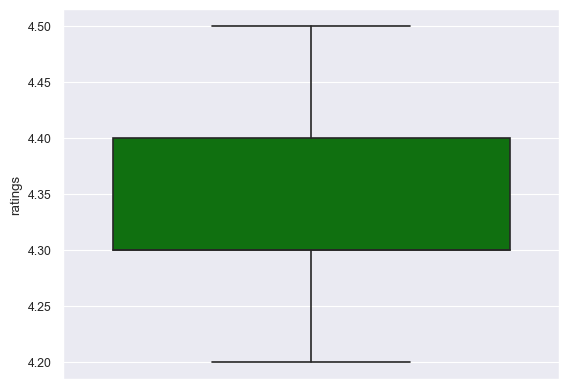

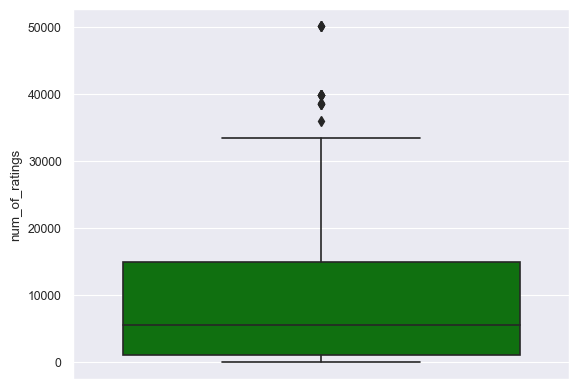

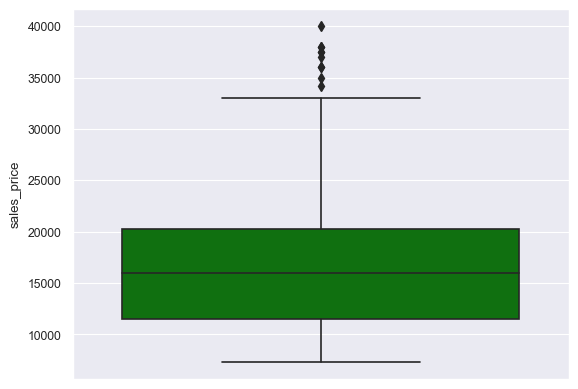

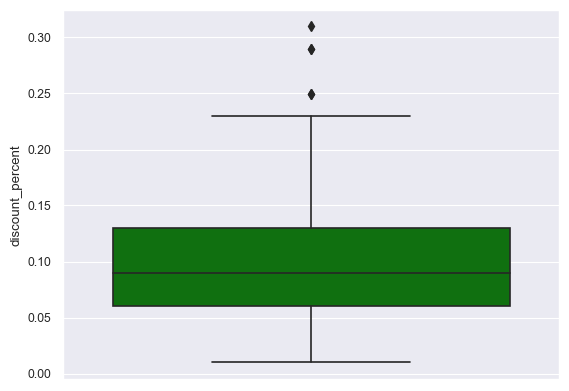

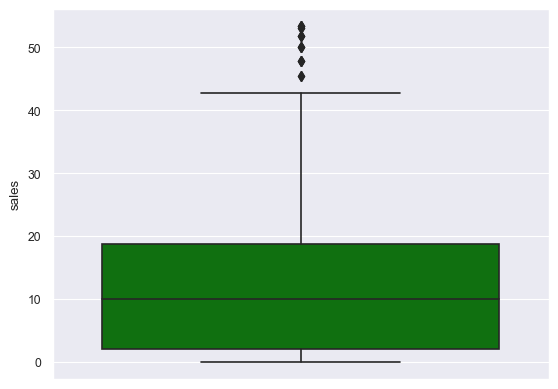

In [37]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i],color="green")
        plt.show();

## checking correlation with target 'sales price'

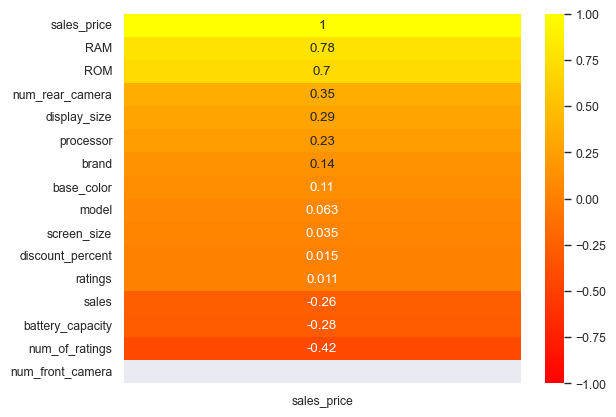

In [38]:
sns.heatmap(data.corr()[["sales_price"]].sort_values(by="sales_price",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

### lets take only the columns with good correlation with target

In [39]:
x=data[['ROM','processor','RAM','model']].values

In [40]:
y=data[['sales_price']].values

## Feature scaling

In [41]:
rs = RobustScaler()
x = rs.fit_transform(x)

## Model Building

In [42]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [43]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4419.7325526557615
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  4414.904597353611
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  17962.658389710698
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3375.8132912128303
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3213.867418687752
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  4182.693477398961
*********************************************

## Selecting GradientBoostingRegressor as it having best metrics

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
model=GradientBoostingRegressor()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [48]:
y_pred=model.predict(x)
OUTPUT=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTION"),dtype=float)
OUTPUT.head()

ACTUAL    PREDICTION
0   8999.0   9875.019370
1  10999.0  11046.145585
2   9999.0  10854.570972
3  11999.0  13229.224048
4  11999.0  13229.224048

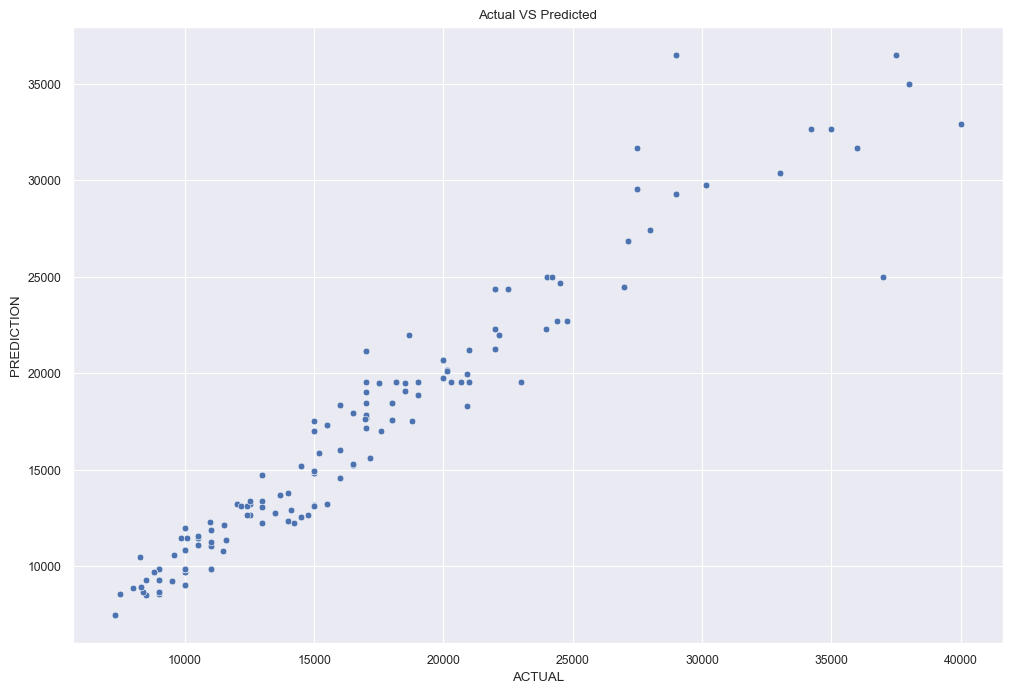

In [49]:
plt.figure(figsize=(12,8))
plt.title('Actual VS Predicted')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTION");